# Notebook extracción y limpieza de datos Memoria

## Recopilación de datos
Archivos con notas de estudiantes se encuentran almacenados en xlsx o csv separados por campus. Además, en alguno de los casos, dentro de estos archivos se separá por paralelo, por lo que se vuelve necesario recopilar todos los datos en archivos más simples para un mejor acceso y filtrado posterior.

In [66]:
import pandas as pd
import os
import numpy as np
from typing import List
from multiprocessing import Process, Lock

In [2]:
%%bash 
pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.8.0
    Uninstalling plotly-5.8.0:
      Successfully uninstalled plotly-5.8.0


You should consider upgrading via the '/home/diego/.pyenv/versions/3.7.2/envs/memoria/bin/python3.7 -m pip install --upgrade pip' command.


In [67]:
def get_list_files(path:str,condition:str='')->List[str]:
    """
     Get list of all files inside a directory
     Params:
     >> - path: (str)path of the directory
     >> - condition: (str) string inside in files name. Default ''
     Return:
     >> Array of strings that contains path to all files inside the folder
    """
    data =[]
    for root,dir,filename in os.walk(path,topdown=True):
        data += [ os.path.join(root,name) for name in filename if condition in name]
    return data 

El archivo csv que se va a generar tendrá columnas para todas las notas de cada evaluación, junto con el campus y carrera

In [68]:
CAMPUS = {0:"CC",1:"CSSJ",2:"Vitacura"}
CARRERAS={
    0:'Construcción Civil',
    1:'Ingeniería Civil',
    2:'Ingeniería Civil Ambiental',
    3:'Ingeniería Civil de Minas',
    4:'Ingeniería Civil Eléctrica',
    5:'Ingeniería Civil Electrónica',
    6:'Ingeniería Civil Industrial',
    7:'Ingeniería Civil Informática',
    8:'Ingeniería Civil Matemática',
    9:'Ingeniería Civil Mecánica',
    10:'Ingeniería Civil Metalúrgica',
    11:'Ingeniería Civil Plan Común',
    12:'Ingeniería Civil Química',
    13:'Ingeniería Civil Telemática',
    14:'Ingeniería Comercial',
    15:'Ingeniería en Aviación Comercial',
    16:'Ingeniería en Diseño de Productos',
    17:'Lic. en Astrofísica',
    18:'Lic. en Física',
    19:'Lic. en Ciencias',
    20:'Téc. Univ. Electrónica',
    21:'Especial'
}

In [4]:
HEADER_ROW=2
def join_spreadsheet(file,fil,sem):
        df_new= pd.DataFrame({"Rut":[],"DVR":[],"Nombre":[],"VTR":[],"C1":[],"C2":[],"CR":[],
                            'S1':[],'S2':[],'S3':[],'S4':[],'S5':[],'S6':[],'S7':[],'S8':[],'S9':[],'S10':[],
                           'F1':[],'F2':[],'F3':[],'F4':[],'F5':[],'F6':[],'F7':[],'F8':[],'F9':[],'F10':[],
                            'T1':[],'T2':[],'T3':[],'T4':[],'T5':[],'T6':[],'T7':[],'T8':[],'T9':[],'T10':[],
                             'SM1':[],'SM2':[],'SM3':[],'SM4':[],'SM5':[],'SM6':[],'SM7':[],'SM8':[],"NF":[],'SM9':[],'SM10':[],"Carrera":[],'Campus':[],'Sem':[]})
        df_new['Carrera']=pd.Series(df_new['Carrera'],  dtype="string")
        idCampus= [key for key,val in CAMPUS.items() if val in file][0]
        indexes = [6,7,10,11,14,15,21,36,37,38,39,40,41,42,43,44,45,48,49,50,51,52,53,54,55,56,57,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77,78,79,22]
        if idCampus==2:
           indexes = [6,7,10,11,14,15,21,35,36,37,38,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,60,61,62,63,64,65,66,67,68,69,71,72,73,74,75,76,77,78,22]
        df=pd.read_excel(pd.ExcelFile(file),None, na_filter=False)
        sheets =filter(lambda x: x not in ["Estadísticas","SUMATORIAS"],df.keys())
        for sheet_name in list(sheets):
            rows = df[sheet_name].loc[HEADER_ROW+1:]
            for index, row in rows.iterrows():
                if row[0] != '' and row[0] !='-':
                    try:
                        idCarrera= str(row[0])[4:7]
                        r = row[indexes]
                        df_new.loc[len(df_new)]=list(r)+[0,0,''+idCarrera,idCampus,sem]
                    except:
                        print("Error: ",file,sheet_name)

        df_new.to_csv('./Dataset/Clean/'+CAMPUS[idCampus] +' '+fil+'.csv',decimal='.')

In [51]:
threads = []
temp = '{}-{}'
year = 2021
sem=1
_filter = temp.format(year,sem)
files_path = get_list_files('./Dataset/Dirty/',_filter)
for files in files_path:
    t = Process(target=join_spreadsheet,args=[files,_filter,sem],daemon=True)
    threads.append(t)
    t.start()
    
for t in threads:
    t.join()

Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2021-1 Notas Vitacura IWI-131 VF.xlsx Cuestionario
Error:  ./Dataset/Dirty/2

In [4]:
def parametrize(df,col):
    df_new = df.copy()
    try:
            decimal =1
            cols= pd.to_numeric(df_new[col])
            df_new.loc[cols ==0,col]=0
            df_new.loc[ (cols<=45/decimal) & (cols>0), col]=1
            df_new.loc[ (cols>45/decimal) & (cols <= 55/decimal), col]=2
            df_new.loc[ (cols>55/decimal) & (cols <= 65/decimal), col]=3
            df_new.loc[ cols > 65/decimal, col]=4
    except:
            print(name,col)
    finally:
            return df_new

In [57]:
def map_carrera(x):
    a= [key for key,val in CARRERAS.items() if val in x]
    return a[-1]

def column_discretize(df_new,name):
    for col in df_new.loc[:,'C1':'SM8']:
        df_new[col].replace("-",0,inplace=True)
        df_new[col].replace("",0,inplace=True)
        df_new[col].replace(np.nan,0,inplace=True)
        df_new[col].replace("#¡DIV/0!",0,inplace=True)
        try:
            decimal =1
            cols= pd.to_numeric(df_new[col])
            if ("S" in col) & (('CC' in name) | ('SJ' in name)) & ("M" not in col):
                   decimal=10
           
            df_new.loc[cols ==0,col]=0
            df_new.loc[ (cols<=45/decimal) & (cols>0), col]=1
            df_new.loc[ (cols>45/decimal) & (cols <= 55/decimal), col]=2
            df_new.loc[ (cols>55/decimal) & (cols <= 65/decimal), col]=3
            df_new.loc[ cols > 65/decimal, col]=4
        except:
            print(name,col)



files_list=get_list_files('./Dataset/Clean/')
for file in files_list:
    if 'Discrete' in file:
        continue
    df = pd.read_csv(file)
    name = file.split('/')[-1]
    column_discretize(df,name)
    df['Apr']=  np.where(df['NF']>55,1,0)
    df['Carrera'] = df['Depto'].apply(map_carrera)    
    _df = df.loc[:,'Depto':]
    _df.to_csv("Dataset/Clean/Discrete/"+"Discrete "+name,index=False)

### Sexo de estudiantes
Para obtener el sexo de cada estudiante se utiliza webscrapping en la pagina www.nombrerutyfirma.com, lo cual a punta a automatizar la obtención de datos de nua pagina web repidiendo una serie de pasos.
La libreria a utilizar el selenium y el navegador o browser es Firefox, para poder utilizar este navegador es necesario descargar un driver llamado geecko y guardarlo en un directorio en especifico

In [143]:
from selenium import webdriver
from selenium.webdriver.common.by import By
driver=webdriver.Firefox()

In [1]:
def scrapping_rut(rut):
    driver.get("https://www.nombrerutyfirma.com")
    driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/ul/li[2]/a').click()
    driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div[2]/form/div/input').send_keys(rut)
    driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div[2]/form/div/span/button').click()
    sex= driver.find_element(By.XPATH,'/html/body/div[2]/div/table/tbody/tr/td[3]').text
    if sex=="VAR":
        return 0
    elif sex == "MUJ":
        return 1
    else:
        return ""


In [2]:
def get_ruts(path:str)->None:
    df = pd.read_csv(path)
    sexs = []
    for index, row in df.iterrows():
        rut = str(row['Rut'])+str(row['DVR'])
        sexs.append(get_sex(rut))

Como se tienen archivos separados por semestre, año y campus, se unieran todos los datos en archivos por campus 

In [101]:
from sklearn.utils import shuffle

def join_files_by_campus(campus:str,path):
    files = get_list_files(path,campus)
    _df2=None
    for f in files:
        df = pd.read_csv(f)
        replace_all(df,campus,f)
        if type(_df2) == type(None):
            _df2 = df.copy()
        else:
            _df2 = pd.concat([_df2,df],ignore_index=True)
    return shuffle(_df2)

def replace_all(df,name,f):
    for col in df.loc[:,'C1':'SM8']:
        df[col].replace("-",0,inplace=True)
        df[col].replace("",0,inplace=True)
        df[col].replace(np.nan,0,inplace=True)
        df[col].replace("#¡DIV/0!",0,inplace=True)
        decimal=1
        cols= pd.to_numeric(df[col])
        if ("S" in col) & (('CC' in name) | ('SJ' in name)) & ("M" not in col) and '2021-1' in f:
                   decimal=10
        df.loc[:,col] = cols*decimal

def join_files(path:str,condition:str=''):
    files = get_list_files(path,condition)
    df_CC = pd.read_csv(condition+'CC.csv')
    df_CSSJ = pd.read_csv(condition+'CSSJ.csv')
    df_vit = pd.read_csv(condition+'Vitacura.csv')
    df = pd.concat([df_CC,df_CSSJ,df_vit],ignore_index=True)
    zeros =['0','0.0',0]
    print(df.shape)
    df= df[ (~df['C1'].isin(zeros)) | (~df['C2'].isin(zeros))]
    df.to_csv('All_Rough_data.csv',index=False)

In [102]:
for campus in CAMPUS.values():
    df = join_files_by_campus(campus,'Dataset/Rough/')
    df.to_csv('Rough '+campus+".csv",index=False)
join_files('./','Rough ')

(3979, 50)


In [119]:
df_CC = pd.read_csv('CC.csv')
df_CSSJ = pd.read_csv('CSSJ.csv')
df_vit = pd.read_csv('Vitacura.csv')
df = pd.concat([df_CC,df_CSSJ,df_vit],ignore_index=True)
df= df[ (df['C1']>0) | (df['C2']>0)]
df.to_csv('All_data.csv',index=False)

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('All_discrete_data.csv')
df = df[df['Carrera'] != 14]
df = df[ (df['C1']>0) | (df['C2']>0)]
print ( "Total estudiantes",len(df))
print ("Total Mujeres: ", len(df[df["Sexo"]==1]))
print ("Total Hombres: ", len(df[df["Sexo"]==0]))
print ("Total No definidos: ", len(df[(df["Sexo"]!= 1) & (df["Sexo"]!= 0)]))

Total estudiantes 2282
Total Mujeres:  613
Total Hombres:  1669
Total No definidos:  0


In [70]:
df[['C1','C2','CR','NF','Apr']].corr()

C1        C2        CR        NF       Apr
C1   1.000000  0.226356 -0.283068  0.602660  0.456152
C2   0.226356  1.000000 -0.452536  0.714053  0.602345
CR  -0.283068 -0.452536  1.000000 -0.130877 -0.052419
NF   0.602660  0.714053 -0.130877  1.000000  0.848289
Apr  0.456152  0.602345 -0.052419  0.848289  1.000000

In [71]:
df[['Sem','Campus','NF']].corr()

Sem    Campus        NF
Sem     1.000000  0.051925  0.079749
Campus  0.051925  1.000000 -0.002631
NF      0.079749 -0.002631  1.000000

In [72]:
df_CSApr=df.groupby(['Campus','Sexo','Apr']).agg(total = pd.NamedAgg(column='NF', aggfunc='count')).reset_index()
df_CSApr['Total Estudiantes']=df_CSApr.groupby(['Campus','Sexo'])['total'].transform(sum)
df_CSApr['%rep']= (df_CSApr[df_CSApr['Apr']==0]['total']/df_CSApr[df_CSApr['Apr']==0]['Total Estudiantes'] * 100.0).round(2)
df_CSApr

Campus  Sexo  Apr  total  Total Estudiantes   %rep
0      0.0     0    0    143                835  17.13
1      0.0     0    1    692                835    NaN
2      0.0     1    0     55                295  18.64
3      0.0     1    1    240                295    NaN
4      1.0     0    0    113                700  16.14
5      1.0     0    1    587                700    NaN
6      1.0     1    0     39                227  17.18
7      1.0     1    1    188                227    NaN
8      2.0     0    0     21                134  15.67
9      2.0     0    1    113                134    NaN
10     2.0     1    0     18                 91  19.78
11     2.0     1    1     73                 91    NaN

In [73]:
df_CSApr.groupby(['Campus','Sexo']).agg({'total':'sum'})

total
Campus Sexo       
0.0    0       835
       1       295
1.0    0       700
       1       227
2.0    0       134
       1        91

In [74]:
print ("Total Aprobados: ", len(df[df["NF"]>=55]))
print ("Total Reprobados: ", len(df[df["NF"]<55]))
print(df['NF'].describe())

Total Aprobados:  1904
Total Reprobados:  378
count    2282.000000
mean       73.252556
std        22.134384
min         1.000000
25%        67.000000
50%        78.000000
75%        89.000000
max       100.000000
Name: NF, dtype: float64


In [11]:
df[ (df['C1']>0) | (df['C2']>0)]

Depto   C1   C2   CR   S1   S2   S3   S4  \
0          Ingeniería Civil Industrial  4.0  4.0  0.0  4.0  4.0  4.0  4.0   
1         Ingeniería Civil Electrónica  1.0  4.0  0.0  4.0  0.0  4.0  4.0   
2         Ingeniería Civil Informática  1.0  4.0  2.0  4.0  4.0  4.0  3.0   
3         Ingeniería Civil Electrónica  4.0  3.0  0.0  4.0  4.0  4.0  4.0   
4                     Ingeniería Civil  1.0  0.0  0.0  4.0  4.0  4.0  3.0   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
2279  Ingeniería en Aviación Comercial  2.0  4.0  0.0  4.0  4.0  4.0  4.0   
2280       Ingeniería Civil Industrial  4.0  4.0  0.0  4.0  4.0  4.0  4.0   
2281       Ingeniería Civil Industrial  4.0  0.0  3.0  4.0  0.0  4.0  4.0   
2282  Ingeniería en Aviación Comercial  1.0  2.0  4.0  4.0  1.0  4.0  2.0   
2283  Ingeniería en Aviación Comercial  4.0  2.0  0.0  4.0  4.0  4.0  4.0   

       S5   S6  ...  SM7  SM8    NF  SM9  SM10  Carrera  Campus  Sem  Sexo  \
0     4.0  4.0  ...  4.0  4.0  96.0  0.0   0.0        6     0.0  2.0     0   
1     4.0  4.0  ...  4.0  4.0  69.0  0.0   0.0        5     0.0  1.0     0   
2     4.0  0.0  ...  0.0  0.0  70.0  0.0   0.0        7     0.0  1.0     0   
3     4.0  4.0  ...  4.0  4.0  81.0  0.0   0.0        5     0.0  2.0     0   
4     1.0  4.0  ...  4.0  4.0  23.0  0.0   0.0        1     0.0  1.0     0   
...   ...  ...  ...  ...  ...   ...  ...   ...      ...     ...  ...   ...   
2279  4.0  4.0  ...  4.0  0.0  79.0  NaN   NaN       15     2.0  1.0     0   
2280  4.0  1.0  ...  4.0  4.0  95.0  0.0   0.0        6     2.0  2.0     0   
2281  4.0  4.0  ...  4.0  4.0  53.0  0.0   0.0        6     2.0  2.0     0   
2282  4.0  1.0  ...  0.0  4.0  65.0  NaN   NaN       15     2.0  1.0     1   
2283  4.0  3.0  ...  4.0  4.0  80.0  0.0   0.0       15     2.0  2.0     0   

      Apr  
0       1  
1       1  
2       1  
3       1  
4       0  
...   ...  
2279    1  
2280    1  
2281    0  
2282    1  
2283    1  

[2282 rows x 50 columns]

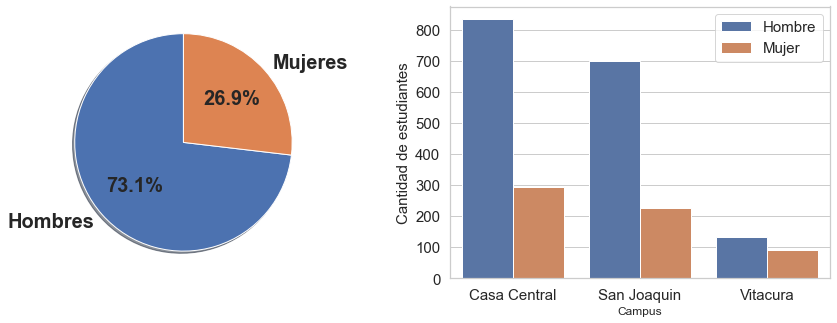

In [68]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.set_theme(style="whitegrid")
axs[0].pie(df['Sexo'].value_counts().values,labels=['Hombres','Mujeres'],autopct='%1.1f%%',shadow=True,startangle=90,normalize=True,textprops={
        'weight' : 'bold',
        'size'   : 20})
aa=sns.countplot(data=df,x='Campus', hue="Sexo")
aa.set_xticklabels(['Casa Central','San Joaquin','Vitacura'],fontdict={"size":"15"})
aa.legend(labels=['Hombre','Mujer'],fontsize=15)
aa.tick_params(axis='both', which='major', labelsize=15)
aa.set_ylabel('Cantidad de estudiantes',fontdict={"size":"15"})
plt.savefig('pie-Sexo.png')

In [54]:
df[['Sexo','Campus']].value_counts()

Sexo  Campus
0     1.0       1034
      0.0        835
1     1.0        311
      0.0        295
0     2.0        134
1     2.0         91
dtype: int64

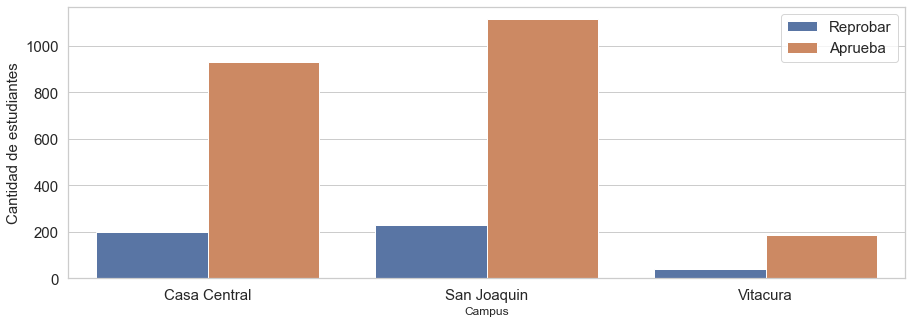

In [55]:
fig= plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
aa=sns.countplot(data=df,x='Campus', hue="Apr")
aa.set_xticklabels(['Casa Central','San Joaquin','Vitacura'],fontdict={"size":"15"})
aa.legend(labels=['Reprobar','Aprueba'],fontsize=15)
aa.tick_params(axis='both', which='major', labelsize=15)
aa.set_ylabel('Cantidad de estudiantes',fontdict={"size":"15"})
plt.savefig('apr-by-campus.png')

/home/diego/.pyenv/versions/3.7.2/envs/memoria/lib/python3.7/site-packages/seaborn/axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


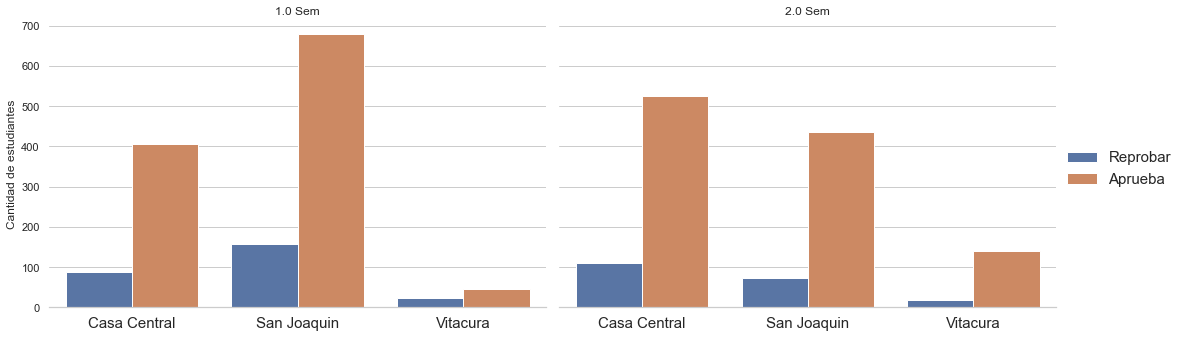

In [56]:

aa = sns.catplot(x="Campus", hue="Apr", col="Sem",data=df, kind="count", height=5, aspect=1.5,legend=False);

(aa.set_axis_labels("", "Cantidad de estudiantes")
  .add_legend(labels=['Reprobar','Aprueba'],fontsize=15)
  .set_xticklabels(['Casa Central','San Joaquin','Vitacura'],fontdict={"size":"15"})
  .set_titles("{col_name} {col_var}")
  .despine(left=True))  

plt.savefig('apr-by-campus-sem.png')

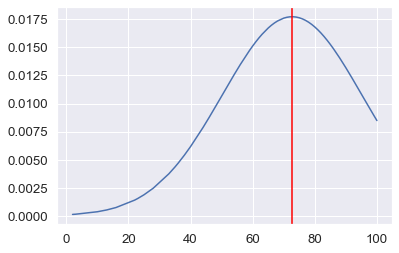

In [96]:
import scipy.stats as stats
val = df[df.Campus==2].sort_values('NF')
pdf=stats.norm.pdf(val.NF,val.NF.mean(),val.NF.std())
plt.plot(val.NF, pdf)
plt.axvline(x=val.NF.mean(), color="red")


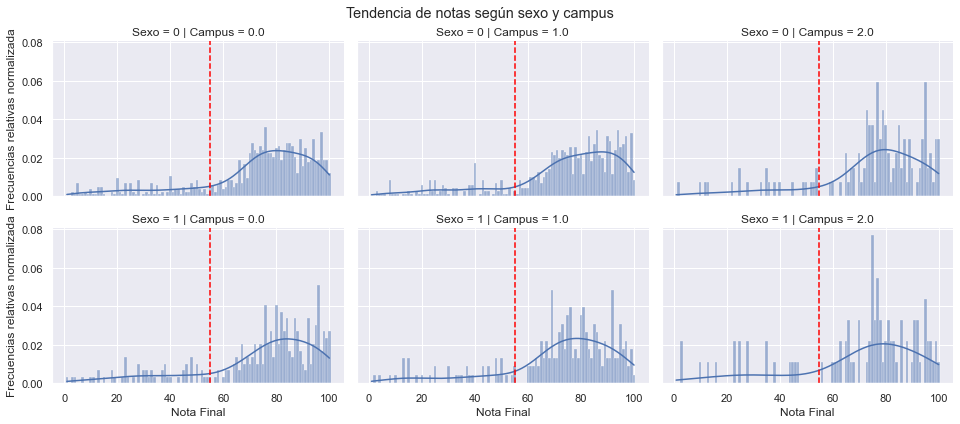

In [107]:
sns.set_style("darkgrid")
ax= sns.displot(df, x="NF", col="Campus", row="Sexo",height=3,aspect=1.5, kind="hist",stat='probability',kde=True,discrete=True,common_norm=False,)
ax.refline(x=55, color="red")
ax.set_axis_labels("Nota Final", "Frecuencias relativas normalizada")
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Tendencia de notas según sexo y campus")
plt.savefig('tendencia-NF-sexo-campus.png')

In [25]:
import plotly.graph_objects as go
import plotly.express as px

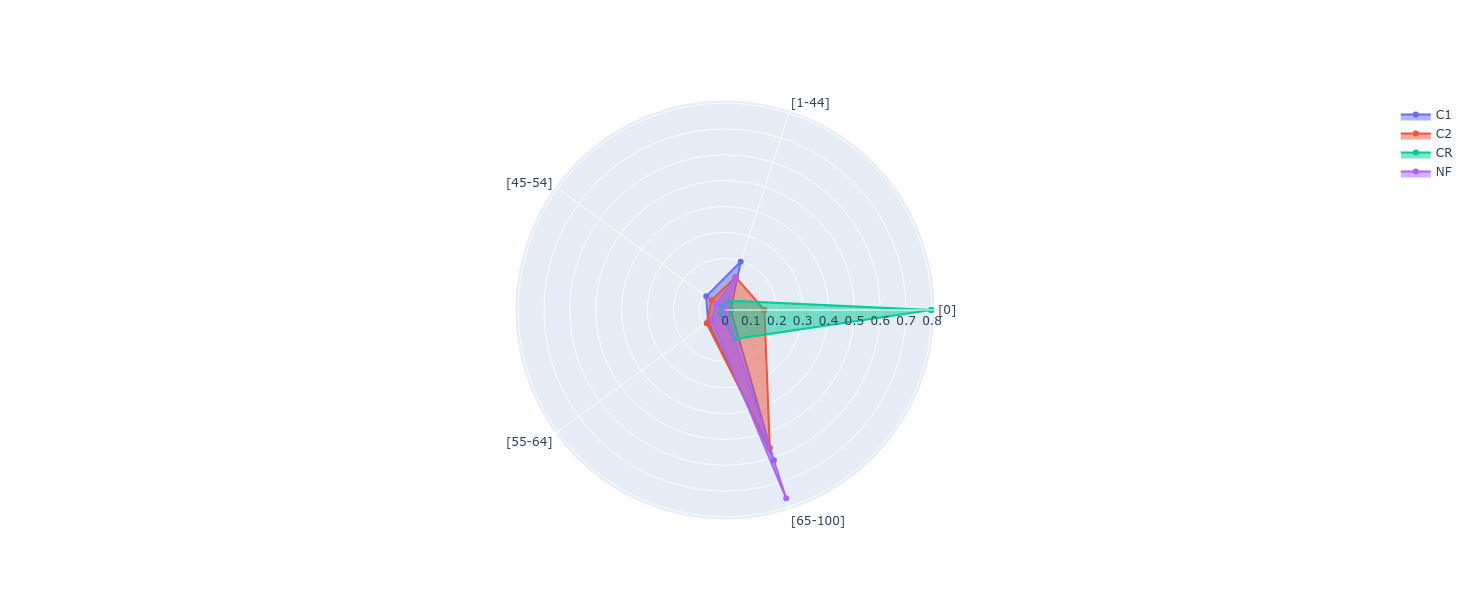

In [61]:
import plotly.graph_objects as go
_df = parametrize(df,'NF')
categories = ['[0]','[1-44]', '[45-54]', '[55-64]','[65-100]']
categories = [*categories, categories[0]]

res = pd.concat([_df['C1'].value_counts(),_df['C2'].value_counts(),_df['CR'].value_counts(),_df['NF'].value_counts()],axis=1).div(2284).fillna(0)
restaurant_1 = res['C1'].values
restaurant_2 = res['C2'].values
restaurant_3 = res['NF'].values

restaurant_4 = res['CR'].values
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]
restaurant_4 = [*restaurant_4, restaurant_4[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=restaurant_1, theta=categories, fill='toself', name='C1'),
        go.Scatterpolar(r=restaurant_2, theta=categories, fill='toself', name='C2'),
        go.Scatterpolar(r=restaurant_4, theta=categories, fill='toself', name='CR'),
        go.Scatterpolar(r=restaurant_3, theta=categories, fill='toself', name='NF')
        
    ],
    layout=go.Layout(
        polar={'radialaxis': {'visible': True}},
        showlegend=True,
        height=600,
        autosize=True

    )
)
fig.show()
fig.write_image('test.png')

In [8]:
_df = parametrize(df,'NF')
_df[['C1','C2','CR','NF','Apr']].corr()

C1        C2        CR        NF       Apr
C1   1.000000  0.226356 -0.283068  0.495478  0.456152
C2   0.226356  1.000000 -0.452536  0.622129  0.602345
CR  -0.283068 -0.452536  1.000000 -0.057649 -0.052419
NF   0.495478  0.622129 -0.057649  1.000000  0.959045
Apr  0.456152  0.602345 -0.052419  0.959045  1.000000

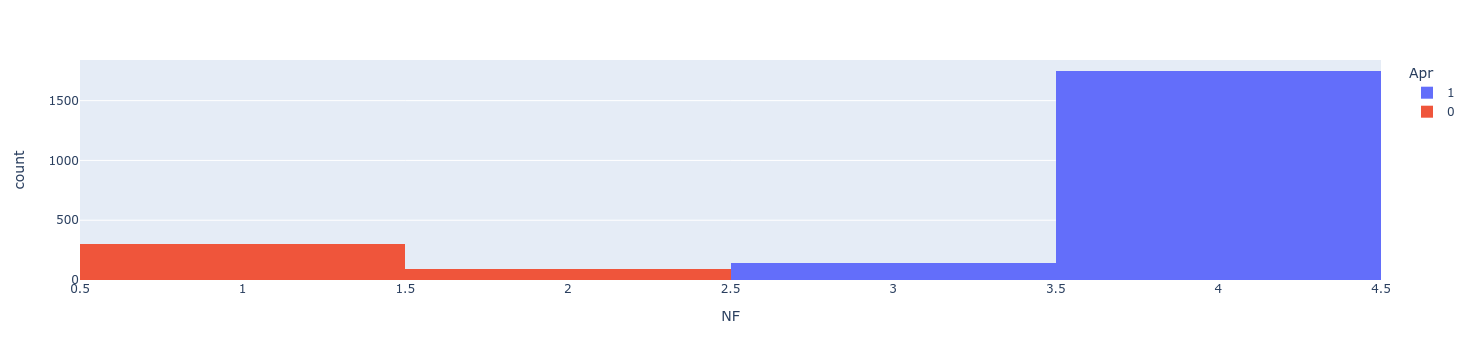

In [11]:

_df = parametrize(df,'NF')
c1 = _df['C1'].value_counts().sort_index().values[1:]
nf = _df['NF'].value_counts().sort_index().values
fig=px.histogram(_df, x="NF", color="Apr" )
fig.show()

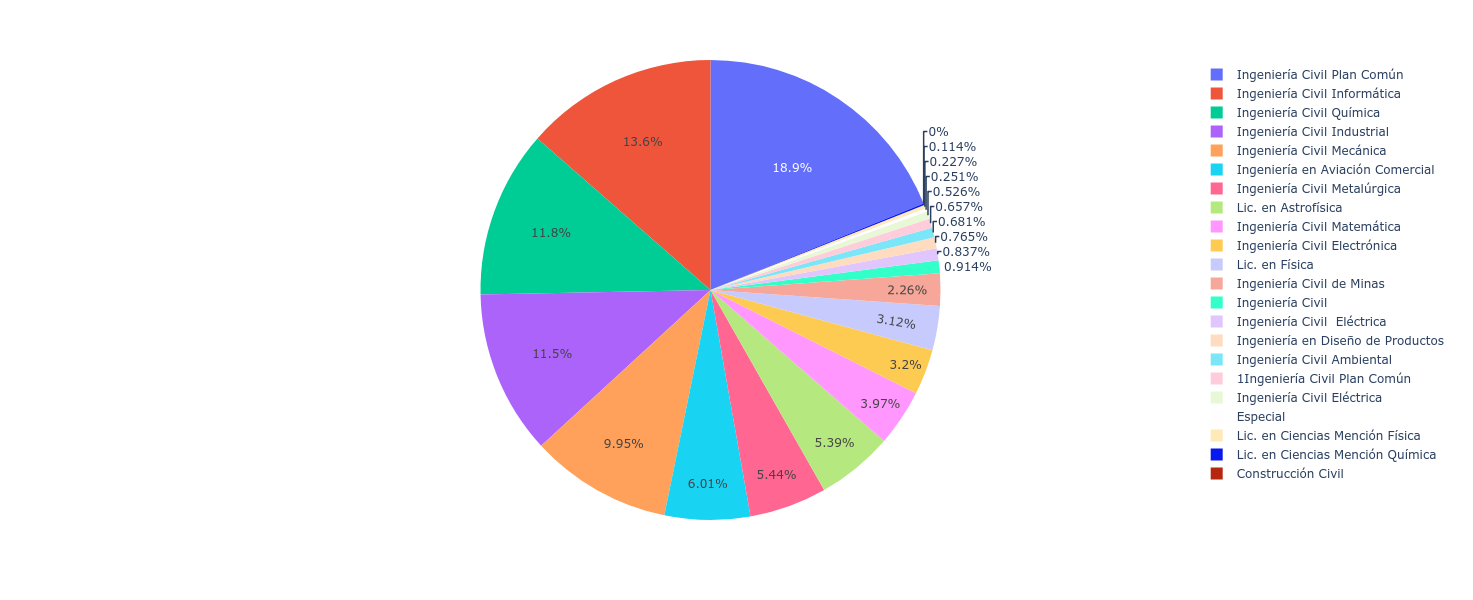

In [32]:
fig=px.pie(df,values='Carrera',names='Depto',width=1000,height=600)
fig.show()
fig.write_image('CounterCarrera.png')

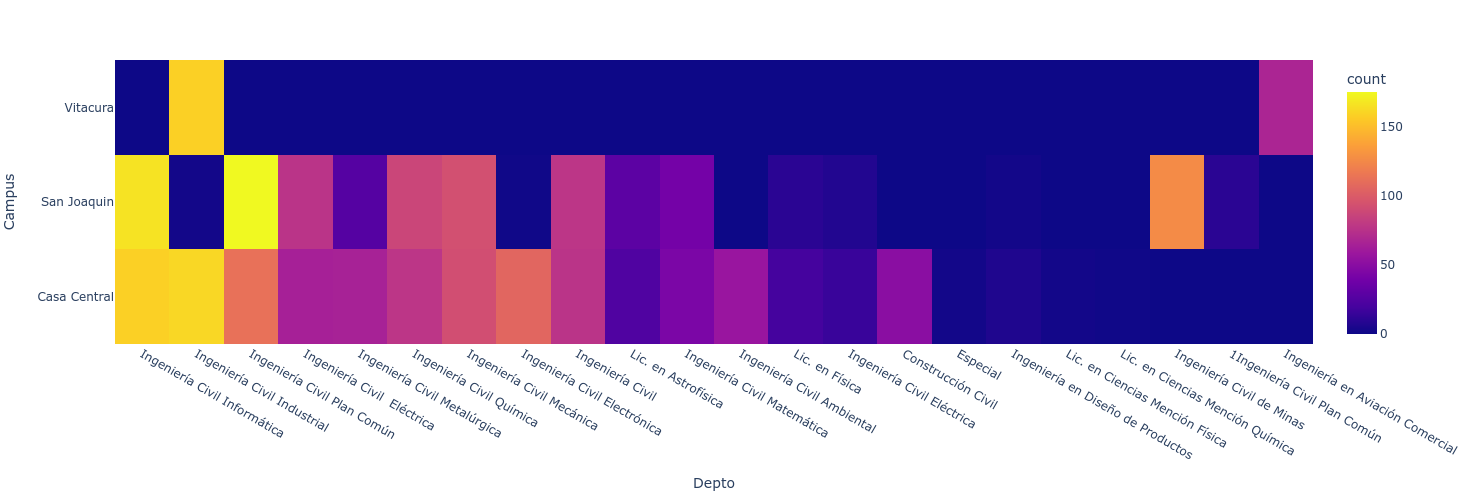

In [126]:
fig=px.density_heatmap(df,x='Depto',y='Campus',height=500,)
fig.update_layout(
     xaxis=dict(
        showgrid=True,
        gridwidth=5,
        gridcolor='white',),
    yaxis=dict(
        showgrid=True,
        gridwidth=5,
        gridcolor='white',
        tickmode= 'array',
        tick0= 0,         
        tickvals= [0,1,2],
        ticktext = ['Casa Central','San Joaquin','Vitacura']))
fig.show()
fig.write_image('./Plots/Depto_campus_heatmap.png')

In [12]:
fig=px.histplot(df,x='Depto',y='Campus',height=500,discrete=(True,True))
fig.update_layout(
     xaxis=dict(
        showgrid=True,
        gridwidth=5,
        gridcolor='white',),
    yaxis=dict(
        showgrid=True,
        gridwidth=5,
        gridcolor='white',
        tickmode= 'array',
        tick0= 0,         
        tickvals= [0,1,2],
        ticktext = ['Casa Central','San Joaquin','Vitacura']))
fig.show()

AttributeError: module 'plotly.express' has no attribute 'histplot'

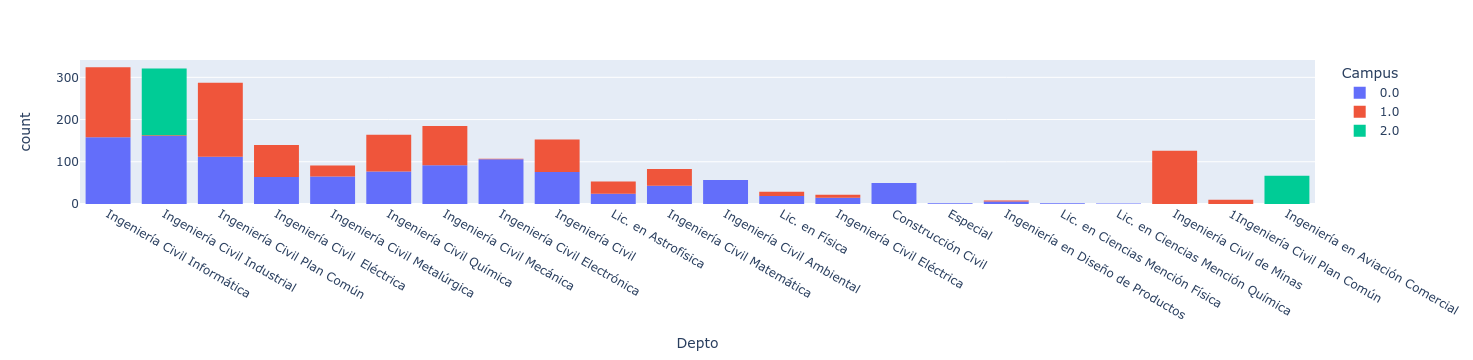

In [35]:
fig = px.histogram(df, x="Depto",color='Campus')
fig.show()

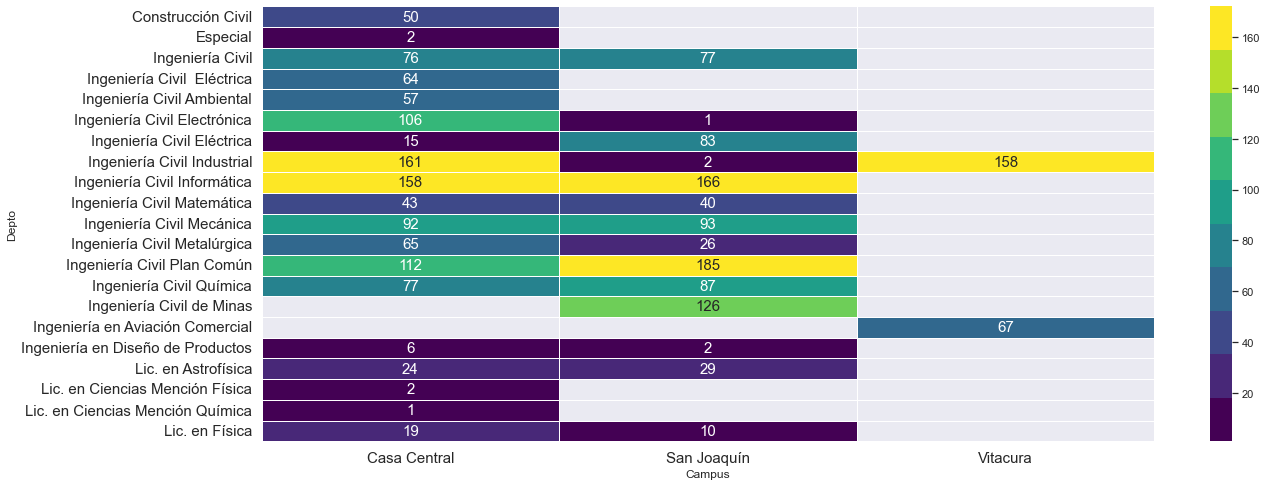

In [95]:
sns.axes_style("darkgrid")
plt.figure(figsize=(20,8))
g= sns.heatmap(
    data = pd.crosstab(df.Campus,df.Depto).T.replace(0,np.NaN),
    annot=True,
    annot_kws={'fontsize':15},
    fmt='.10g',
    robust=True,
    xticklabels=['Casa Central','San Joaquín','Vitacura'],
    linewidths=.5,cmap=px.colors.sequential.Viridis)
g.tick_params(labelsize=15)
plt.savefig('campus-carrera.png')

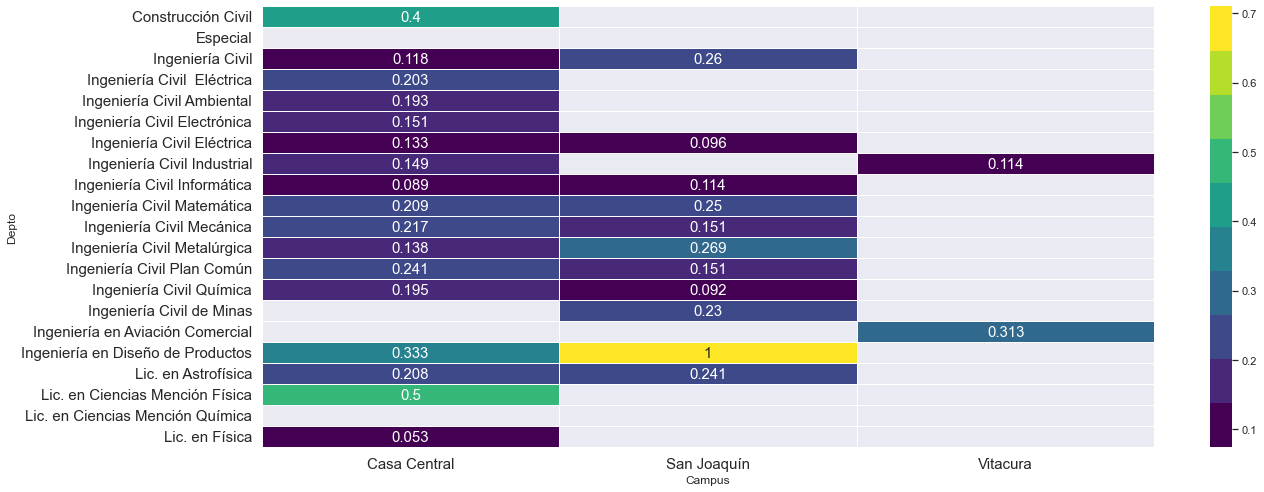

In [94]:
_df= df[df.Apr==0]
plt.figure(figsize=(20,8.11))
g= sns.heatmap(
    data = pd.crosstab(_df.Campus,_df.Depto).T.replace(0,np.NaN).div(pd.crosstab(df.Campus,df.Depto).T.replace(0,np.NaN)).round(3),
    annot=True,
    annot_kws={'fontsize':15},
    fmt='.10g',
    robust=True,
    xticklabels=['Casa Central','San Joaquín','Vitacura'],
    linewidths=.5,cmap=px.colors.sequential.Viridis)
g.tick_params(labelsize=15)
plt.savefig('Apr-carrera-campus.png')

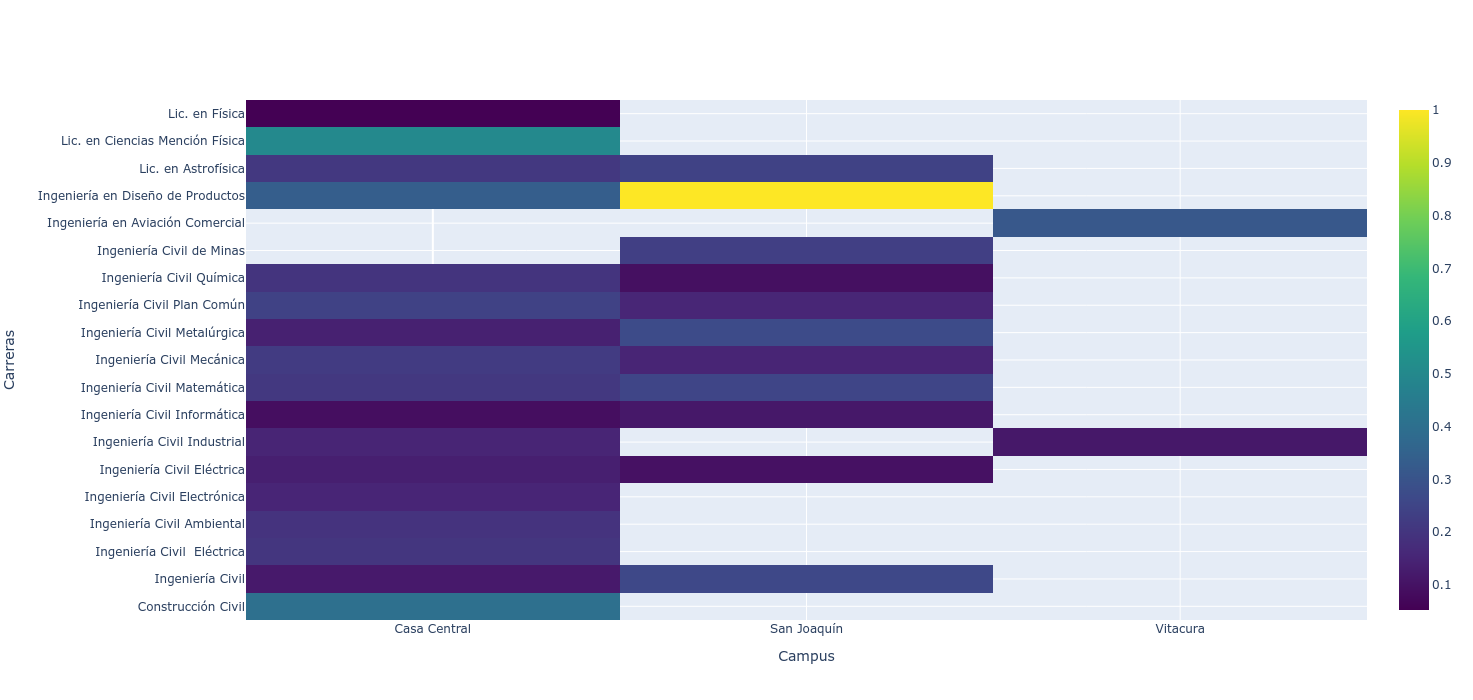

In [34]:
_df=df.groupby(['Depto','Campus','Apr']).size().reset_index(name='counts')
_df3= _df.groupby(['Depto','Campus'])['counts'].transform('sum')
_df['counts']= _df['counts'].div(_df3)

_df2= _df[_df['Apr']==0]

fig = go.Figure(data=go.Heatmap(
        z=_df2['counts'],
        x=_df2['Campus'],
        y=_df2['Depto'],
    text=_df2['counts'],
        colorscale='Viridis'))

fig.update_layout(
    xaxis= dict( 
        title= 'Campus',
        tickmode='array', 
        tickvals=[0,1,2],
        ticktext=['Casa Central','San Joaquín','Vitacura']),
    yaxis= dict(
        title='Carreras'
    ),
    showlegend=True,
    width=1450,
    height=700
)
fig.show()
#fig.write_image('Apr-carrera-campus.png')

## Tareas

In [12]:
df_tareas = df[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10']].copy()
#_df.eq(0.0).any(1)
df_tareas['tareasRealizas']=(df_tareas!=0.0).sum(axis=1)
df_tareas['NF']=df['NF']
df_tareas['Apr']=df['Apr']

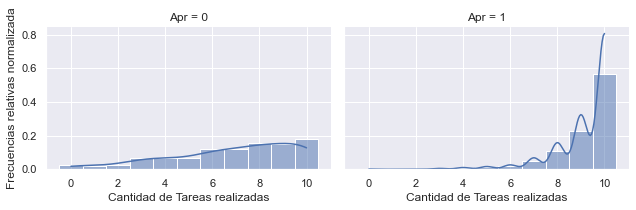

In [42]:
sns.set_style("darkgrid")
ax= sns.displot(df_tareas, x="tareasRealizas", col="Apr",height=3,aspect=1.5, kind="hist",stat='probability',kde=True,discrete=True,common_norm=False)
ax.set_axis_labels("Cantidad de Tareas realizadas", "Frecuencias relativas normalizada",fontdict={"size":"12"})
#plt.savefig('Tareas-Apr.png')

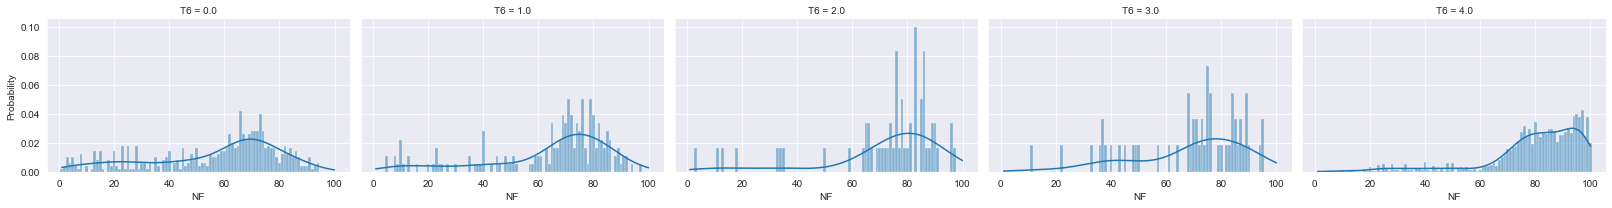

In [82]:
sns.displot(df, x="NF", col="T6",height=3,aspect=1.5, kind="hist",stat='probability',kde=True,discrete=True,common_norm=False)

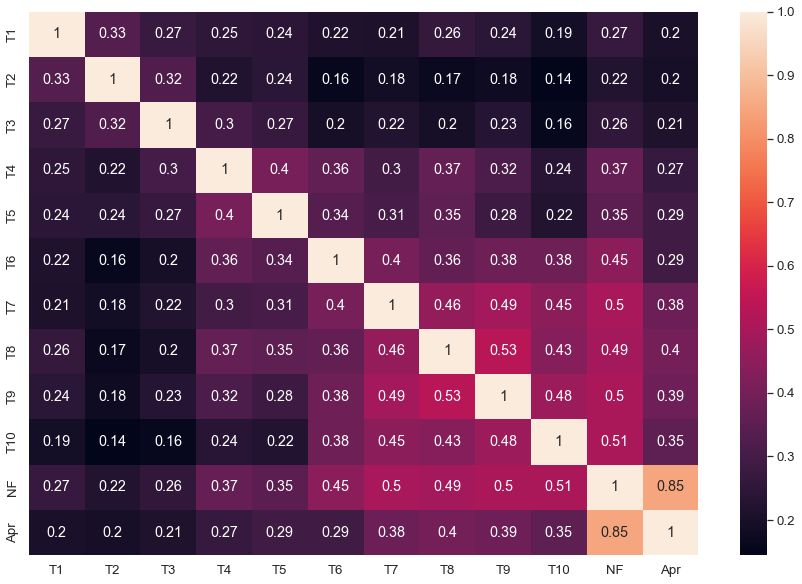

In [13]:
corr = df[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','NF','Apr']].corr()
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values
           ,annot=True,
           )
plt.savefig('Corr_tareas.png')

In [79]:
def minMax(x):
    return pd.Series(index=['min','max','avg'],data=[x.min(),x.max(),x.mean()])
df[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10']].apply(minMax)

T1        T2      T3        T4        T5        T6        T7  \
min  0.000000  0.000000  0.0000  0.000000  0.000000  0.000000  0.000000   
max  4.000000  4.000000  4.0000  4.000000  4.000000  4.000000  4.000000   
avg  3.791411  3.861963  3.7844  3.464067  3.636284  2.814636  3.063103   

           T8        T9      T10  
min  0.000000  0.000000  0.00000  
max  4.000000  4.000000  4.00000  
avg  3.333918  3.237949  2.69369

In [30]:
pd.concat([ df[f'T{i}'].value_counts(normalize=True) for i in range (1,11)],axis=1).mul(100.0).round(2)

T1     T2     T3     T4     T5     T6     T7     T8     T9    T10
0.0   4.12   2.80   3.99   9.64   7.14  21.82  15.56  11.48  15.95  28.88
1.0   0.74   0.31   0.92   3.11   1.49   7.89   7.54   4.91   3.07   3.24
2.0   0.48   0.39   0.92   1.97   0.88   2.59   3.33   2.02   1.01   1.80
3.0   1.18   0.88   1.01   1.75   1.58   2.41   2.19   1.93   1.18   1.80
4.0  93.47  95.62  93.16  83.52  88.91  65.29  71.38  79.67  78.79  64.29

In [32]:
pd.concat([ df[f'T{i}'].value_counts(normalize=False) for i in range (1,11)],axis=1).loc[1:4].sum(axis=0).sum()

20050

## Controles

In [33]:
df_controles = df[['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','NF','Apr']].copy()
#_df.eq(0.0).any(1)
df_controles['ControlesRealizados']=(df_controles[[f'S{i}' for i in range(1,11)]]!=0.0).sum(numeric_only=True,axis=1)
df_controles['Aprobados']=(df_controles[[f'S{i}' for i in range (1,11)]]>2.0).sum(numeric_only=True,axis=1)
df_controles

S1   S2   S3   S4   S5   S6   S7   S8   S9  S10    NF  Apr  \
0     4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  96.0    1   
1     4.0  0.0  4.0  4.0  4.0  4.0  4.0  4.0  3.0  4.0  69.0    1   
2     4.0  4.0  4.0  3.0  4.0  0.0  4.0  4.0  1.0  4.0  70.0    1   
3     4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  81.0    1   
4     4.0  4.0  4.0  3.0  1.0  4.0  4.0  1.0  0.0  4.0  23.0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
2279  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  0.0  4.0  79.0    1   
2280  4.0  4.0  4.0  4.0  4.0  1.0  4.0  4.0  4.0  4.0  95.0    1   
2281  4.0  0.0  4.0  4.0  4.0  4.0  4.0  0.0  4.0  4.0  53.0    0   
2282  4.0  1.0  4.0  2.0  4.0  1.0  3.0  4.0  0.0  4.0  65.0    1   
2283  4.0  4.0  4.0  4.0  4.0  3.0  4.0  1.0  4.0  3.0  80.0    1   

      ControlesRealizados  Aprobados  
0                      10         10  
1                       9          9  
2                       9          8  
3                      10         10  
4                       9          7  
...                   ...        ...  
2279                    9          9  
2280                   10          9  
2281                    8          8  
2282                    9          6  
2283                   10          9  

[2282 rows x 14 columns]

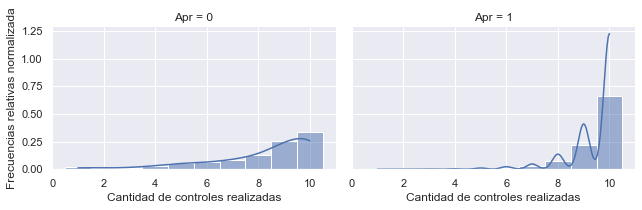

In [38]:
sns.set_style("darkgrid")
ax= sns.displot(df_controles, x="ControlesRealizados", col="Apr",height=3,aspect=1.5, kind="hist",stat='probability',kde=True,discrete=True,common_norm=False)
ax.set_axis_labels("Cantidad de controles realizadas", "Frecuencias relativas normalizada",fontdict={"size":"12"})
plt.savefig('Plots/Controles-Apr.png')

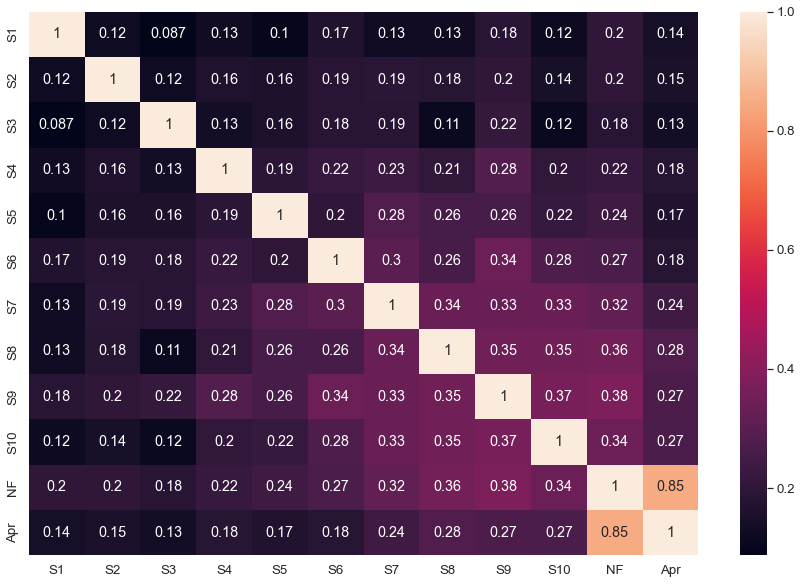

In [34]:
corr = df_controles[['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','NF','Apr']].corr()
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values
           ,annot=True
           )
plt.savefig('Corr_controles.png')

In [36]:
df[['S1','S2','S3','S4','S5','S6','S7','S8','S8','S10']]
pd.concat([ df[f'S{i}'].value_counts(normalize=True) for i in range (1,11)],axis=1).mul(100.0).round(2)

S1     S2     S3     S4     S5     S6     S7     S8     S9    S10
0.0  10.34   7.01   8.41   4.47   4.29   5.83   6.84   7.76  12.18   9.55
1.0   0.26   4.60   0.39   4.65   1.45   7.19   3.33   2.85  11.74   3.24
2.0   0.09   0.04    NaN   0.88   5.17    NaN   1.14   3.24    NaN   0.04
3.0   0.26   4.91    NaN   6.79    NaN   9.20   2.10   0.18   7.62   2.85
4.0  89.04  83.44  91.19  83.22  89.09  77.78  86.59  85.98  68.45  84.31

In [46]:
pd.concat([ df[f'S{i}'].value_counts(normalize=False) for i in range (1,11)],axis=1).loc[1:4].sum(axis=0)

S1     2046.0
S2     2122.0
S3     2090.0
S4     2180.0
S5     2184.0
S6     2149.0
S7     2126.0
S8     2105.0
S9     2004.0
S10    2064.0
dtype: float64

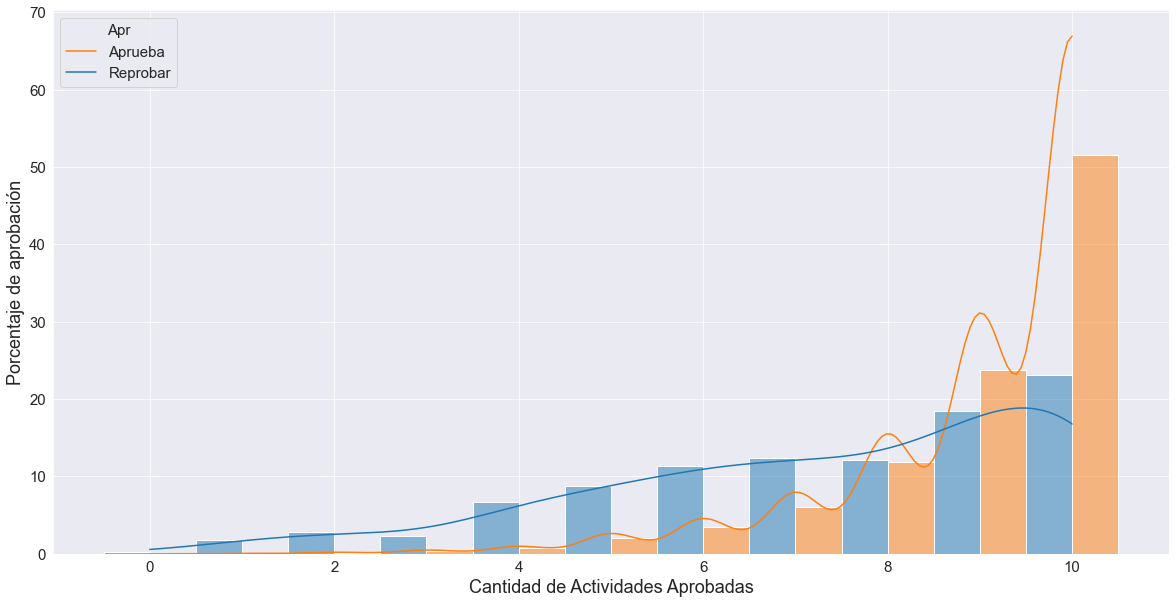

In [115]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
g = sns.histplot(data=df_controles,hue='Apr',x='Aprobados',multiple='dodge',common_norm=False,stat='percent',discrete=True,legend=False,kde=True)
g.tick_params(labelsize=15)
g.set_xlabel('Cantidad de Actividades Aprobadas',fontdict={'fontsize':18})
g.set_ylabel('Porcentaje de aprobación',fontdict={'fontsize':18})
g.legend(labels=['Aprueba','Reprobar'],fontsize=15, title='Apr',title_fontsize=15)

## Evaluaciones formativas

In [47]:
df_formativas = df[['Depto','Sem','Apr','NF']+ [f'F{i}' for i in range(1,11)]].copy()

In [58]:
df_formativas['FormativosRealizados']=(df_formativas[[f'F{i}' for i in range(1,11)]]!=0.0).sum(numeric_only=True,axis=1)
df_formativas

Depto  Sem  Apr    NF   F1   F2   F3   F4  \
0         Ingeniería Civil Informática  1.0    1  98.0  4.0  4.0  4.0  4.0   
1          Ingeniería Civil Industrial  1.0    1  67.0  4.0  4.0  0.0  4.0   
2          Ingeniería Civil Plan Común  2.0    1  80.0  4.0  4.0  4.0  4.0   
3          Ingeniería Civil  Eléctrica  2.0    1  89.0  4.0  4.0  4.0  4.0   
4         Ingeniería Civil Informática  1.0    1  79.0  4.0  4.0  4.0  4.0   
...                                ...  ...  ...   ...  ...  ...  ...  ...   
2279  Ingeniería en Aviación Comercial  2.0    1  95.0  4.0  4.0  4.0  4.0   
2280  Ingeniería en Aviación Comercial  2.0    1  75.0  4.0  4.0  4.0  4.0   
2281       Ingeniería Civil Industrial  2.0    1  73.0  1.0  4.0  4.0  4.0   
2282       Ingeniería Civil Industrial  1.0    0  10.0  1.0  4.0  0.0  4.0   
2283       Ingeniería Civil Industrial  2.0    1  99.0  4.0  4.0  4.0  4.0   

       F5   F6   F7   F8   F9  F10  FormativosRealizados  
0     4.0  4.0  4.0  4.0  4.0  4.0                    10  
1     4.0  4.0  0.0  4.0  0.0  0.0                     6  
2     4.0  4.0  4.0  4.0  4.0  4.0                    10  
3     4.0  4.0  4.0  4.0  4.0  4.0                    10  
4     4.0  4.0  4.0  4.0  4.0  4.0                    10  
...   ...  ...  ...  ...  ...  ...                   ...  
2279  4.0  4.0  4.0  4.0  4.0  4.0                    10  
2280  1.0  4.0  4.0  4.0  4.0  0.0                     9  
2281  4.0  4.0  4.0  4.0  4.0  4.0                    10  
2282  0.0  4.0  0.0  4.0  0.0  0.0                     5  
2283  4.0  4.0  4.0  4.0  4.0  4.0                    10  

[2282 rows x 15 columns]

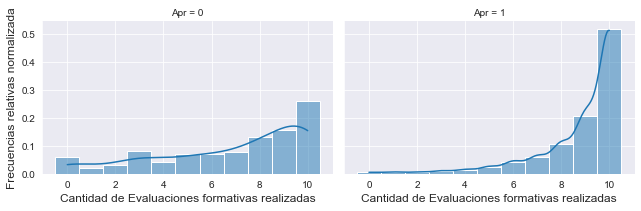

In [101]:
sns.set_style("darkgrid")
ax= sns.displot(df_formativas, x="FormativosRealizados", col="Apr",height=3,aspect=1.5, kind="hist",stat='probability',kde=True,discrete=True,common_norm=False)
ax.set_axis_labels("Cantidad de Evaluaciones formativas realizadas", "Frecuencias relativas normalizada",fontdict={"size":"12"})
plt.savefig('Formativos-Apr.png')

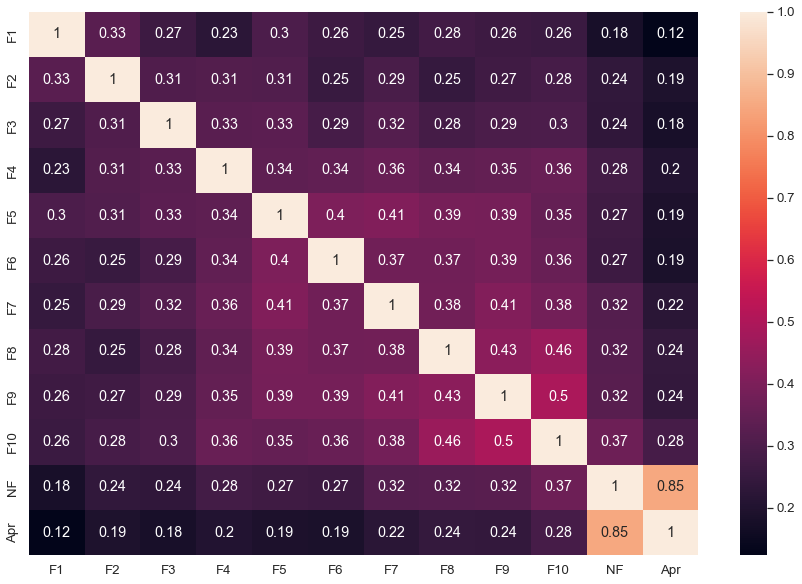

In [128]:
corr = df_formativas[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','NF','Apr']].corr()
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
g=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values
           ,annot=True,
           )

plt.savefig('Corr_formativas.png')

In [48]:
pd.concat([ df_formativas[f'F{i}'].value_counts(normalize=True) for i in range (1,11)],axis=1).mul(100.0).round(2)

F1     F2     F3     F4     F5     F6     F7     F8     F9    F10
0.0  13.72   9.86   9.95  15.47  15.16  17.05  16.70  19.54  18.45  18.36
1.0   0.22   0.13   0.31   0.96   0.70   0.79   0.83   0.31   0.35   0.09
2.0   0.13   0.22   0.26   0.70   0.44   0.26   0.70   0.13   0.61   0.22
3.0   0.57   0.74   0.53   1.10   0.74   0.96   1.36   0.39   0.96   0.26
4.0  85.36  89.04  88.96  81.77  82.95  80.94  80.41  79.62  79.62  81.07

In [54]:
pd.concat([ df_formativas[f'F{i}'].value_counts(normalize=False) for i in range (1,11)],axis=1).loc[1:4].sum(axis=1).sum()

19300

### Evaluaciones SMOJ

In [55]:
df_smoj =df[['Depto','Apr','Sem','NF']+[f'SM{i}' for i in range(1,9)]].copy()

In [9]:
df_smoj['SMRealizados']=(df_smoj[[f'SM{i}' for i in range(1,9)]]!=0.0).sum(numeric_only=True,axis=1)
df_smoj

Depto  Apr  Sem  ...  SM7  SM8  SMRealizados
0          Ingeniería Civil Industrial    1  2.0  ...  4.0  4.0             7
1         Ingeniería Civil Electrónica    1  1.0  ...  4.0  4.0             6
2         Ingeniería Civil Informática    1  1.0  ...  0.0  0.0             6
3         Ingeniería Civil Electrónica    1  2.0  ...  4.0  4.0             7
4                     Ingeniería Civil    0  1.0  ...  4.0  4.0             7
...                                ...  ...  ...  ...  ...  ...           ...
2279  Ingeniería en Aviación Comercial    1  1.0  ...  4.0  0.0             7
2280       Ingeniería Civil Industrial    1  2.0  ...  4.0  4.0             8
2281       Ingeniería Civil Industrial    0  2.0  ...  4.0  4.0             8
2282  Ingeniería en Aviación Comercial    1  1.0  ...  0.0  4.0             3
2283  Ingeniería en Aviación Comercial    1  2.0  ...  4.0  4.0             8

[2282 rows x 13 columns]

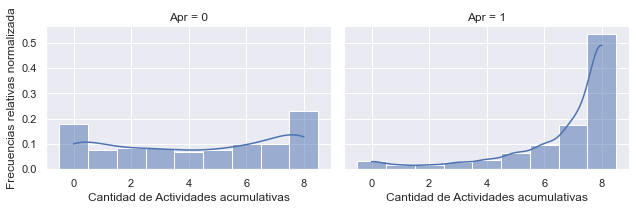

In [77]:
sns.set_style("darkgrid")
ax= sns.displot(df_smoj, x="SMRealizados", col="Apr",height=3,aspect=1.5, kind="hist",stat='probability',kde=True,discrete=True,common_norm=False)
ax.set_axis_labels("Cantidad de Actividades acumulativas", "Frecuencias relativas normalizada",fontdict={"size":"12"})
plt.savefig('SM-Apr.png')

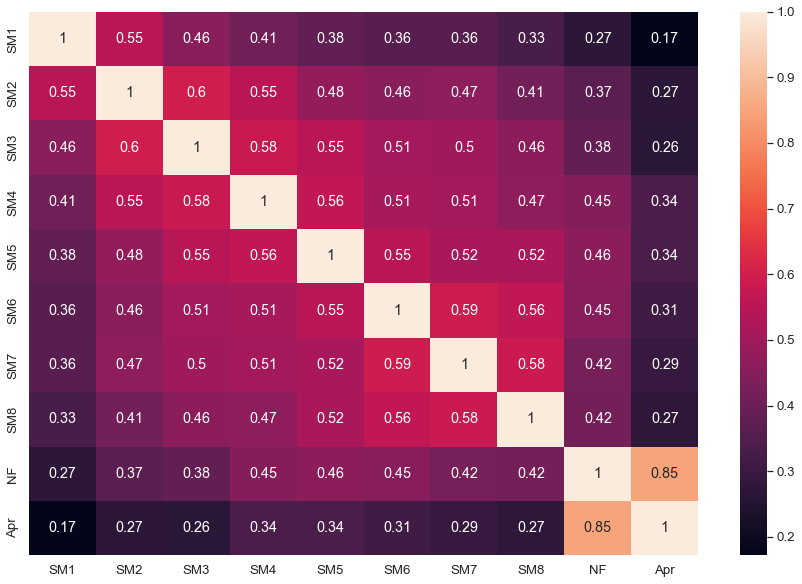

In [79]:
corr = df_smoj[[f'SM{i}' for i in range(1,9)]+['NF','Apr']].corr()
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
g=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values
           ,annot=True,
           )

plt.savefig('Corr_SMOJ.png')

In [56]:
pd.concat([ df_smoj[f'SM{i}'].value_counts(normalize=True) for i in range (1,9)],axis=1).mul(100.0).round(2)

SM1    SM2    SM3    SM4    SM5    SM6    SM7    SM8
0.0  17.97  13.98  16.74  17.79  21.56  26.60  26.51  30.81
1.0   1.36   1.31   0.88   0.39   0.48   1.36   1.49   0.79
2.0   0.39   0.13   0.57   0.22   0.44   1.40   0.18   0.31
3.0    NaN   1.53   0.18   0.35   0.44   0.26   0.09   0.88
4.0  80.28  83.04  81.64  81.24  77.08  70.38  71.74  67.22

In [47]:
df_smoj['Aprobados']=df_smoj.apply(lambda x: (x[[f'SM{i}' for i in range (1,9)]]>2.0).sum(),axis=1)
df_smoj

Depto  Apr  Sem  ...  SM8  SMRealizados  Aprobados
0          Ingeniería Civil Industrial    1  2.0  ...  4.0             7          7
1         Ingeniería Civil Electrónica    1  1.0  ...  4.0             6          6
2         Ingeniería Civil Informática    1  1.0  ...  0.0             6          6
3         Ingeniería Civil Electrónica    1  2.0  ...  4.0             7          7
4                     Ingeniería Civil    0  1.0  ...  4.0             7          7
...                                ...  ...  ...  ...  ...           ...        ...
2279  Ingeniería en Aviación Comercial    1  1.0  ...  0.0             7          6
2280       Ingeniería Civil Industrial    1  2.0  ...  4.0             8          8
2281       Ingeniería Civil Industrial    0  2.0  ...  4.0             8          8
2282  Ingeniería en Aviación Comercial    1  1.0  ...  4.0             3          3
2283  Ingeniería en Aviación Comercial    1  2.0  ...  4.0             8          8

[2282 rows x 14 columns]

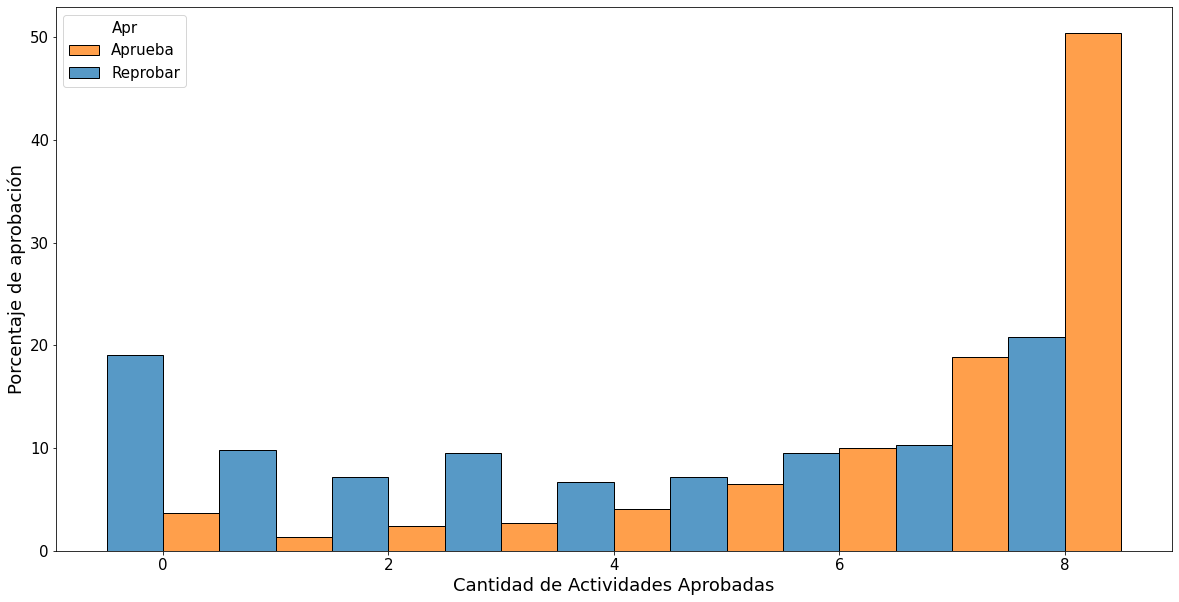

In [106]:
plt.figure(figsize=(20,10))
g = sns.histplot(data=df_smoj,hue='Apr',x='Aprobados',multiple='dodge',common_norm=False,stat='percent',discrete=True,legend=False)
g.tick_params(labelsize=15)
g.set_xlabel('Cantidad de Actividades Aprobadas',fontdict={'fontsize':18})
g.set_ylabel('Porcentaje de aprobación',fontdict={'fontsize':18})
g.legend(labels=['Aprueba','Reprobar'],fontsize=15, title='Apr',title_fontsize=15)
#plt.savefig('SMOJAprFreq.png')

## Semestre

In [4]:
df['SRealizadas']=(df[[f'S{i}' for i in range(1,11)]] !=0.0).sum(axis=1)
df['TRealizadas']=(df[[f'T{i}' for i in range(1,11)]] !=0.0).sum(axis=1)
df['FRealizadas']=(df[[f'F{i}' for i in range(1,11)]] !=0.0).sum(axis=1)
df['SMRealizadas']=(df[[f'SM{i}' for i in range(1,9)]] !=0.0).sum(axis=1)
df

Depto   C1   C2   CR   S1   S2   S3   S4  \
0          Ingeniería Civil Industrial  4.0  4.0  0.0  4.0  4.0  4.0  4.0   
1         Ingeniería Civil Electrónica  1.0  4.0  0.0  4.0  0.0  4.0  4.0   
2         Ingeniería Civil Informática  1.0  4.0  2.0  4.0  4.0  4.0  3.0   
3         Ingeniería Civil Electrónica  4.0  3.0  0.0  4.0  4.0  4.0  4.0   
4                     Ingeniería Civil  1.0  0.0  0.0  4.0  4.0  4.0  3.0   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
2279  Ingeniería en Aviación Comercial  2.0  4.0  0.0  4.0  4.0  4.0  4.0   
2280       Ingeniería Civil Industrial  4.0  4.0  0.0  4.0  4.0  4.0  4.0   
2281       Ingeniería Civil Industrial  4.0  0.0  3.0  4.0  0.0  4.0  4.0   
2282  Ingeniería en Aviación Comercial  1.0  2.0  4.0  4.0  1.0  4.0  2.0   
2283  Ingeniería en Aviación Comercial  4.0  2.0  0.0  4.0  4.0  4.0  4.0   

       S5   S6  ...  SM10  Carrera  Campus  Sem  Sexo  Apr  SRealizadas  \
0     4.0  4.0  ...   0.0        6     0.0  2.0     0    1           10   
1     4.0  4.0  ...   0.0        5     0.0  1.0     0    1            9   
2     4.0  0.0  ...   0.0        7     0.0  1.0     0    1            9   
3     4.0  4.0  ...   0.0        5     0.0  2.0     0    1           10   
4     1.0  4.0  ...   0.0        1     0.0  1.0     0    0            9   
...   ...  ...  ...   ...      ...     ...  ...   ...  ...          ...   
2279  4.0  4.0  ...   NaN       15     2.0  1.0     0    1            9   
2280  4.0  1.0  ...   0.0        6     2.0  2.0     0    1           10   
2281  4.0  4.0  ...   0.0        6     2.0  2.0     0    0            8   
2282  4.0  1.0  ...   NaN       15     2.0  1.0     1    1            9   
2283  4.0  3.0  ...   0.0       15     2.0  2.0     0    1           10   

      TRealizadas  FRealizadas  SMRealizadas  
0              10           10             7  
1               9            9             6  
2               9            6             6  
3               9            9             7  
4              10            9             7  
...           ...          ...           ...  
2279           10           10             7  
2280           10           10             8  
2281           10           10             8  
2282            9           10             3  
2283            9           10             8  

[2282 rows x 54 columns]

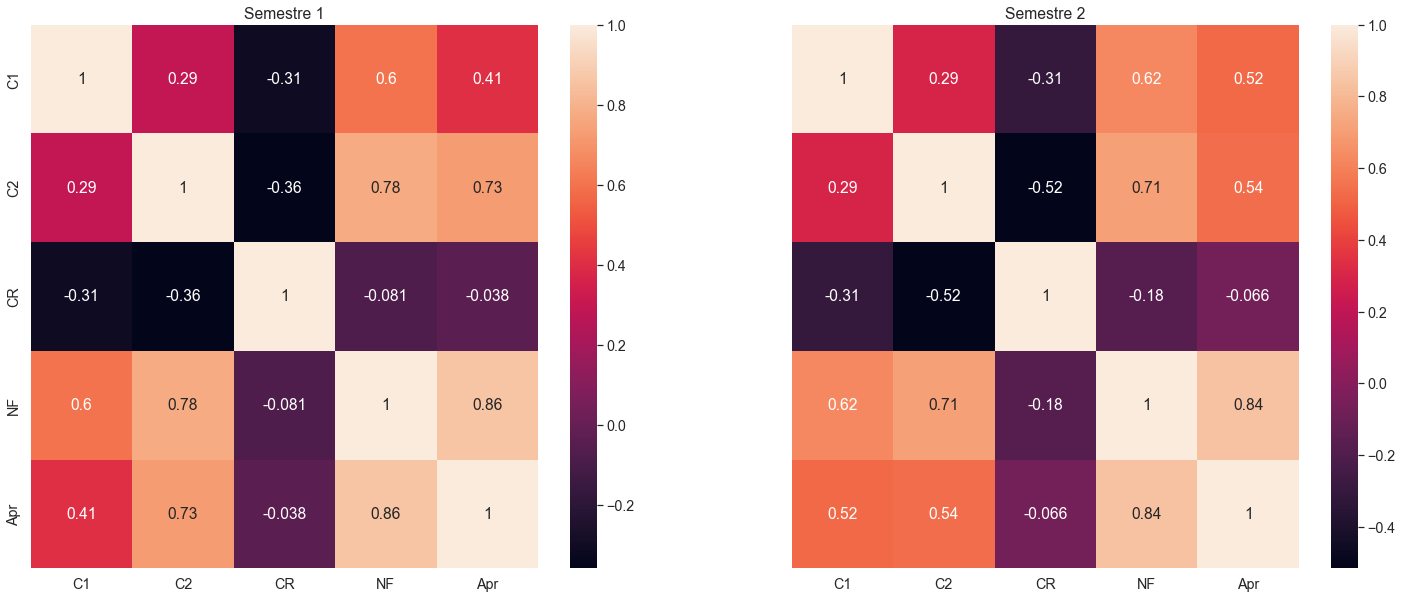

In [10]:
df_s2 =df[df['Sem']==2] 
corr2 = df_s2[['C1','C2','CR','NF','Apr']].corr()
 
df_s1 =df[df['Sem']==1] 
corr1= df_s1[['C1','C2','CR','NF','Apr']].corr()

sns.set(font_scale=1.3)
fig,(ax1,ax2) = plt .subplots(1,2,sharey=True,figsize=(25,10))
sns.heatmap(corr1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values
           ,annot=True,
            ax=ax1
           )
ax1.set_title('Semestre 1')
ax2.set_title('Semestre 2')
sns.heatmap(corr2, 
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values
           ,annot=True,
            ax=ax2
           )
plt.savefig('CorrCertSem.png')

In [70]:
df_s2['NF'].value_counts(normalize=True)

76.0    0.036071
94.0    0.032233
75.0    0.031466
95.0    0.030698
86.0    0.029163
          ...   
14.0    0.000767
3.0     0.000767
47.0    0.000767
34.0    0.000767
51.0    0.000767
Name: NF, Length: 93, dtype: float64

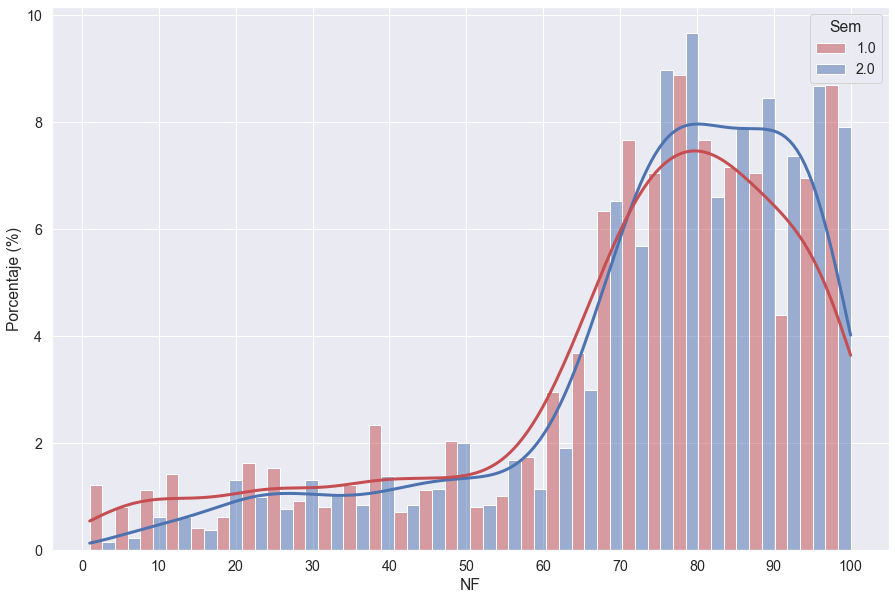

In [155]:
plt.figure(figsize=(15,10))
g = sns.histplot(df,x='NF',hue='Sem',stat='percent',common_norm=False,multiple='dodge',kde=True, palette=["C3", "C0"],line_kws={'linewidth':3})
g.set_ylabel('Porcentaje (%)')
g.set_xticks(range(0,101,10))
plt.savefig('NFSem.png')

In [82]:
_df = parametrize(df,'NF')
df_s1 = _df[_df['Sem']==1]
df_s2 = _df[_df['Sem']==2]

In [158]:
pd.concat([df_s1['Apr'].value_counts(normalize=True) , df_s2['Apr'].value_counts(normalize=True)],axis=1).mul(100.0).round(2)

Apr    Apr
1  80.69  84.65
0  19.31  15.35

In [84]:
pd.concat(
    [ df_s1['C1'].value_counts(normalize=True),
     df_s1['C2'].value_counts(normalize=True),
     df_s1['CR'].value_counts(normalize=True),
    df_s1['NF'].value_counts(normalize=True)],axis=1).mul(100.0).round(2)

C1     C2     CR     NF
0.0   2.35  12.56  80.18    NaN
1.0  31.66   9.50   4.80  15.22
2.0  13.89   5.21   1.94   4.09
3.0   9.40   8.78   1.84   7.15
4.0  42.70  63.94  11.24  73.54

In [83]:
pd.concat(
    [ df_s2['C1'].value_counts(normalize=True),
     df_s2['C2'].value_counts(normalize=True),
     df_s2['CR'].value_counts(normalize=True),
    df_s2['NF'].value_counts(normalize=True)],axis=1).mul(100.0).round(2)

C1     C2     CR     NF
0.0   2.07  17.27  79.51    NaN
1.0  10.59  16.27   3.07  11.44
2.0   5.37   7.44   2.23   3.91
3.0   6.98   8.75   2.92   5.76
4.0  74.98  50.27  12.28  78.89

In [114]:
df.groupby('Sem').agg({'C1': lambda x: (x>0).sum(),'C2':lambda x: (x>0).sum()}).apply(lambda x: x.diff(-1)/x.sum()*100,axis=1)

C1  C2
Sem              
1.0  5.518764 NaN
2.0  8.411215 NaN

In [198]:
from scipy import stats as st

_df = df[(df.C1>0) & (df.C2==0)&(df.Apr==0) & (df.CR==0)] 
print(_df[['Apr','CR']].value_counts(normalize=True))
_df.filter(regex="SM[0-9]").apply(lambda x: st.mode(x>0,nan_policy='omit',),axis=0)

Apr  CR 
0    0.0    1.0
dtype: float64


SM1     SM2     SM3      SM4      SM5      SM6      SM7      SM8  \
0  [True]  [True]  [True]  [False]  [False]  [False]  [False]  [False]   
1   [112]   [107]    [97]     [86]    [100]    [105]    [105]    [111]   

       SM9     SM10  
0  [False]  [False]  
1    [170]    [170]

### Tareas

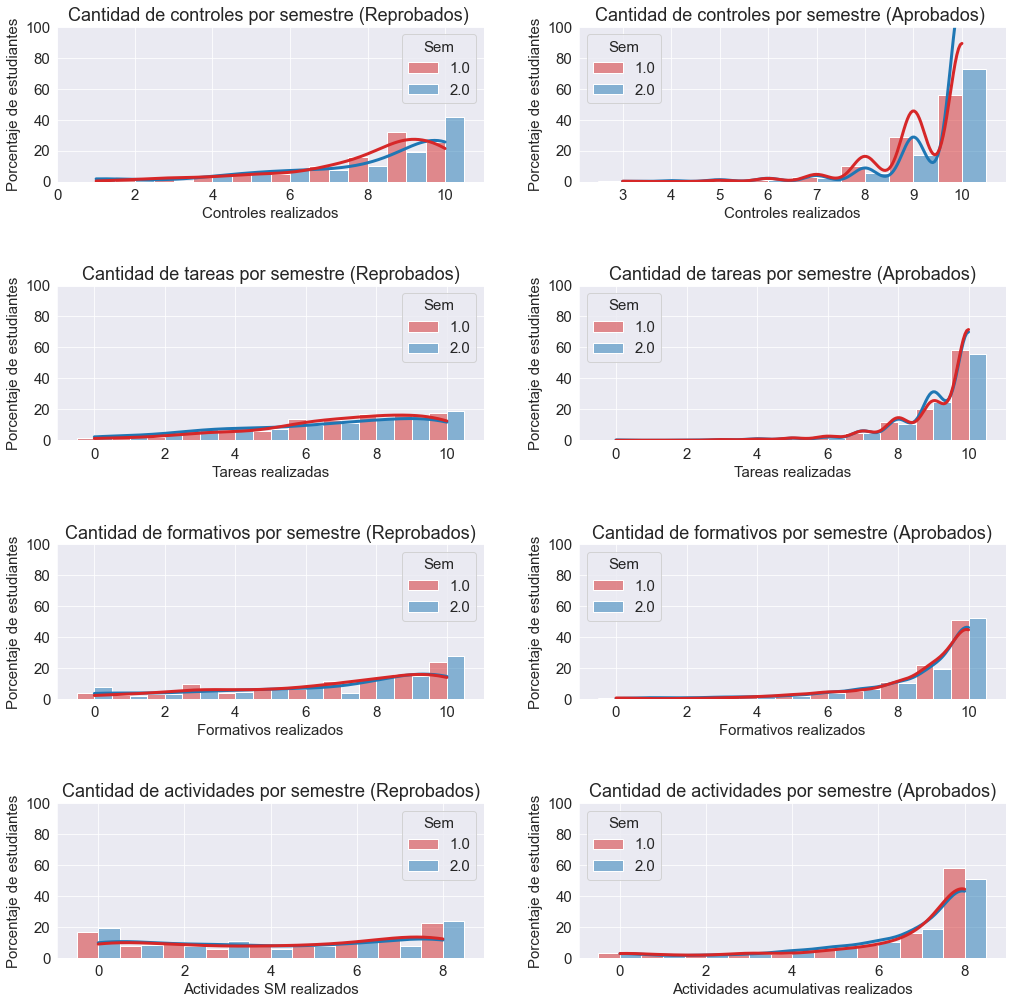

In [124]:
plt.rcParams['font.size'] = '15'
fig ,( (ax0,ax0_1),(ax1,ax1_1),(ax2,ax2_1),(ax3,ax3_1)) = plt.subplots(4,2,figsize=(15,15))


params = {
    'hue':'Sem',
    'stat':'percent',
    'common_norm':False,
    'multiple':'dodge',
    'kde':True,
    'discrete':True,
    'palette':['C3','C0'],
    'line_kws':{'linewidth':3}
}
sns.histplot(df[df['Apr']==0],x='SRealizadas',ax=ax0, **params)
sns.histplot(df[df['Apr']==1],x='SRealizadas',ax=ax0_1, **params)

sns.histplot(df[df['Apr']==0],x='TRealizadas',ax=ax1,**params)
sns.histplot(df[df['Apr']==1],x='TRealizadas',ax=ax1_1,**params)

sns.histplot(df[df['Apr']==0],x='FRealizadas',ax=ax2,**params)
sns.histplot(df[df['Apr']==1],x='FRealizadas',ax=ax2_1,**params)

sns.histplot(df[df['Apr']==0],x='SMRealizadas',ax=ax3,**params)
sns.histplot(df[df['Apr']==1],x='SMRealizadas',ax=ax3_1,**params)

ax0.set_title('Cantidad de controles por semestre (Reprobados) ')
ax0_1.set_title('Cantidad de controles por semestre (Aprobados) ')

ax0.set_xlabel('Controles realizados')
ax0_1.set_xlabel('Controles realizados')
ax0.set_ylabel('Porcentaje de estudiantes')
ax0_1.set_ylabel('Porcentaje de estudiantes')


ax1.set_title('Cantidad de tareas por semestre (Reprobados)')
ax1_1.set_title('Cantidad de tareas por semestre (Aprobados)')

ax1.set_xlabel('Tareas realizadas')
ax1_1.set_xlabel('Tareas realizadas')
ax1.set_ylabel('Porcentaje de estudiantes')
ax1_1.set_ylabel('Porcentaje de estudiantes')

ax2.set_title('Cantidad de formativos por semestre (Reprobados)')
ax2_1.set_title('Cantidad de formativos por semestre (Aprobados)')

ax2.set_xlabel('Formativos realizados')
ax2_1.set_xlabel('Formativos realizados')
ax2.set_ylabel('Porcentaje de estudiantes')
ax2_1.set_ylabel('Porcentaje de estudiantes')

ax3.set_title('Cantidad de actividades por semestre (Reprobados)')
ax3_1.set_title('Cantidad de actividades por semestre (Aprobados)')

ax3.set_xlabel('Actividades SM realizados')
ax3_1.set_xlabel('Actividades acumulativas realizados')
ax3.set_ylabel('Porcentaje de estudiantes')
ax3_1.set_ylabel('Porcentaje de estudiantes')




fig.tight_layout(pad=3.0)


ax0.set_ylim(0,100)
ax0_1.set_ylim(0,100)

ax1.set_ylim(0,100)
ax1_1.set_ylim(0,100)

ax2.set_ylim(0,100)
ax2_1.set_ylim(0,100)

ax3.set_ylim(0,100)
ax3_1.set_ylim(0,100)

plt.savefig('Cantidad_Eval_semestres.png')

<AxesSubplot:>

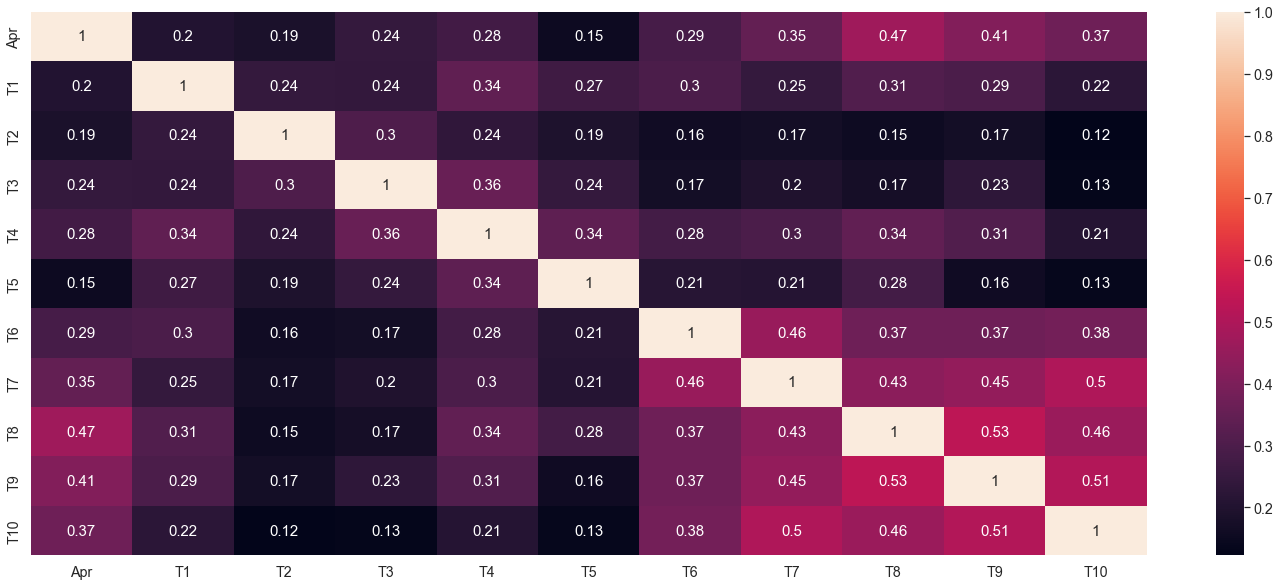

In [67]:
plt.figure(figsize=(25,10))
l = ['Apr']+[f'T{i}' for i in range(1,11)]
sns.heatmap(df[df['Sem']==1][l].corr(), 
            xticklabels=l,
            yticklabels=l
           ,annot=True,
        
           )

<AxesSubplot:>

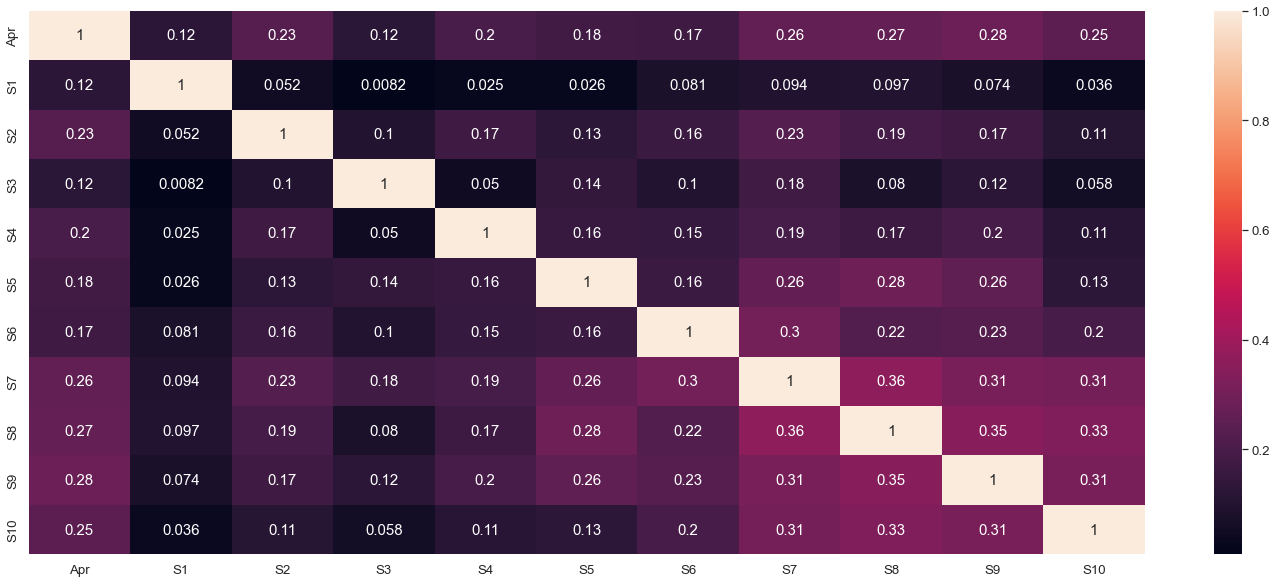

In [94]:
plt.figure(figsize=(25,10))
l = ['Apr']+[f'S{i}' for i in range(1,11)]
sns.heatmap(df[df['Sem']==1][l].corr(), 
            xticklabels=l,
            yticklabels=l
           ,annot=True,
        
           )

<AxesSubplot:>

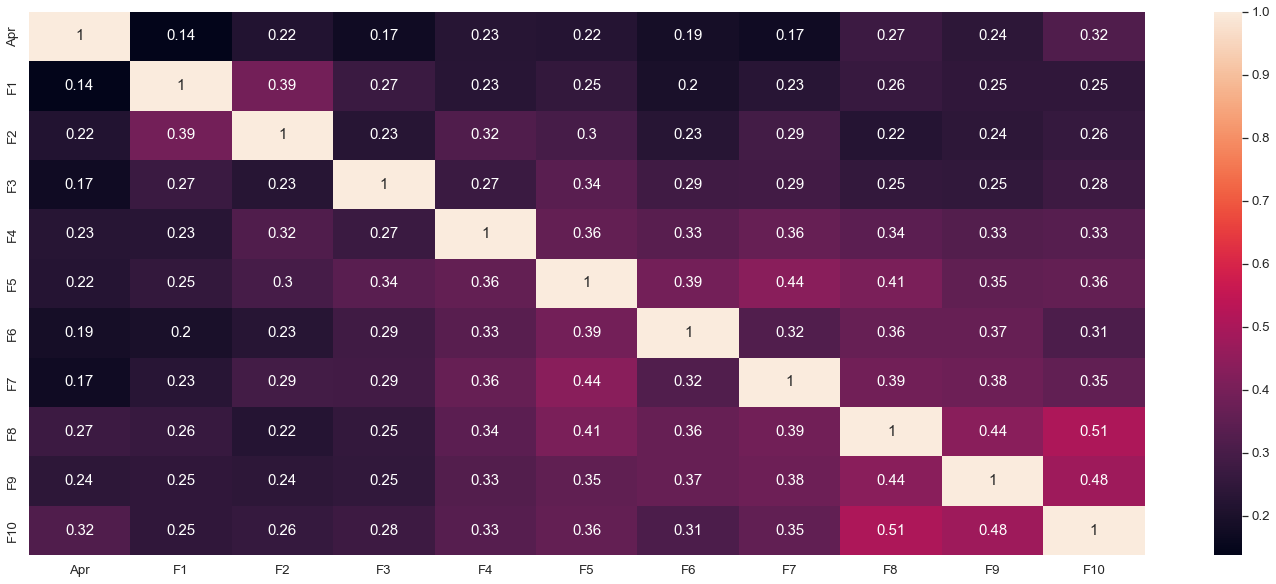

In [95]:
plt.figure(figsize=(25,10))
l = ['Apr']+[f'F{i}' for i in range(1,11)]
sns.heatmap(df[df['Sem']==1][l].corr(), 
            xticklabels=l,
            yticklabels=l
           ,annot=True,
        
           )

<AxesSubplot:>

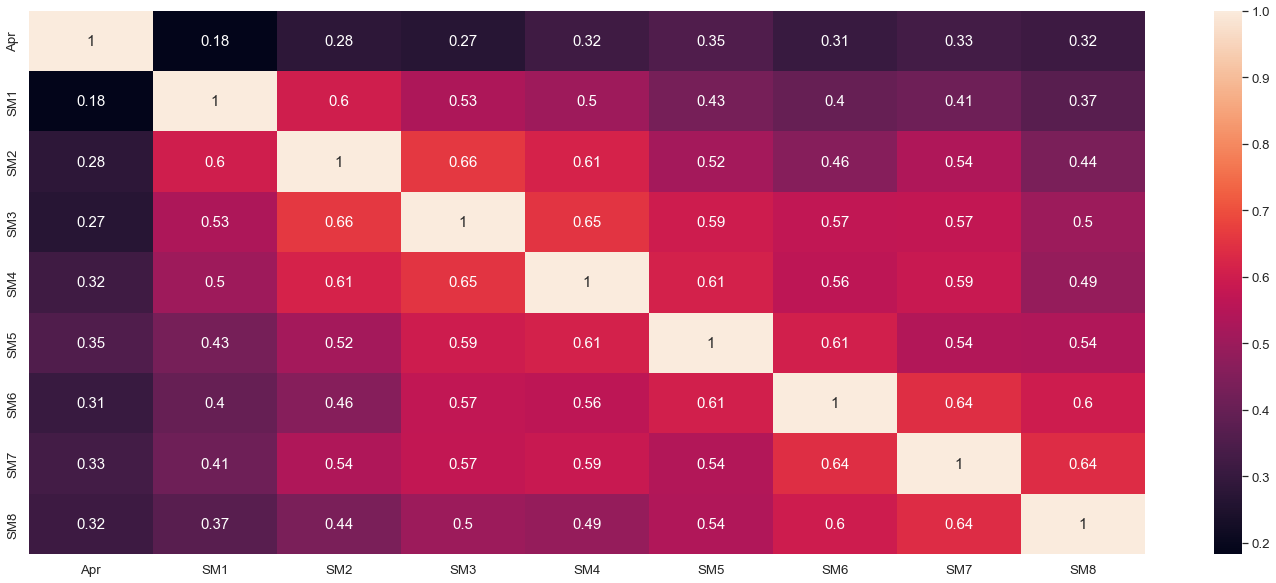

In [96]:
plt.figure(figsize=(25,10))
l = ['Apr']+[f'SM{i}' for i in range(1,9)]
sns.heatmap(df[df['Sem']==1][l].corr(), 
            xticklabels=l,
            yticklabels=l
           ,annot=True,
        
           )

In [6]:
from statsmodels.tsa.stattools import grangercausalitytests

In [23]:
df[df['Apr']==0][['TRealizadas','SMRealizadas']].corr()

TRealizadas  SMRealizadas
TRealizadas      1.000000      0.623164
SMRealizadas     0.623164      1.000000

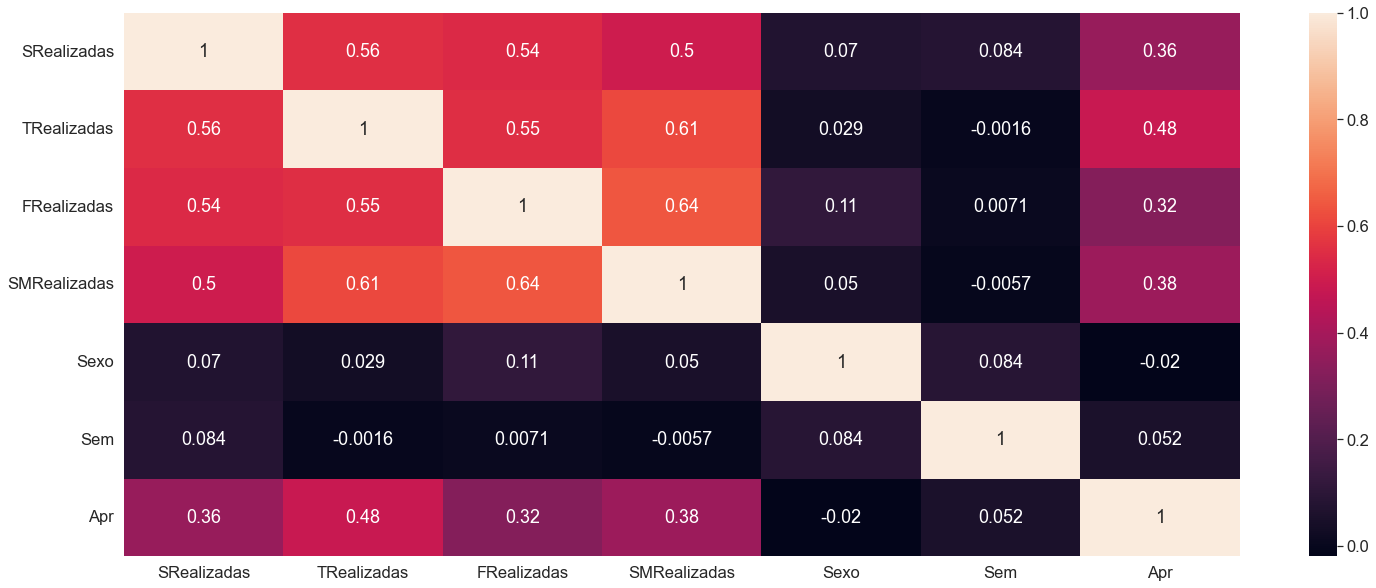

In [86]:
df[['SRealizadas','TRealizadas','FRealizadas','SMRealizadas','Sexo','Sem','Apr']].corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(25,10))
sns.heatmap(df[['SRealizadas','TRealizadas','FRealizadas','SMRealizadas','Sexo','Sem','Apr']].corr(), 
            xticklabels=['SRealizadas','TRealizadas','FRealizadas','SMRealizadas','Sexo','Sem','Apr'],
            yticklabels=['SRealizadas','TRealizadas','FRealizadas','SMRealizadas','Sexo','Sem','Apr']
           ,annot=True,
        
           )
plt.savefig('CorrRealizadas.png')

In [80]:
chi2_contingency(pd.crosstab(df.Sem, df.Apr))

(5.910716295696513,
 0.01504905149297267,
 1,
 array([[ 166.88475022,  812.11524978],
        [ 222.11524978, 1080.88475022]]))

In [39]:
df[(df.SMRealizadas==0) & (df.TRealizadas==9)].shape

(12, 56)

In [30]:
from scipy.stats import linregress,chi2_contingency

In [29]:
linregress(df[df['Apr']==1]['TRealizadas'],df[df['Apr']==1]['SMRealizadas'])

LinregressResult(slope=0.7715478925513304, intercept=-0.39818327905585704, rvalue=0.482692764471201, pvalue=4.542034112279287e-111, stderr=0.03219186936306457, intercept_stderr=0.2985882899070636)

<AxesSubplot:>

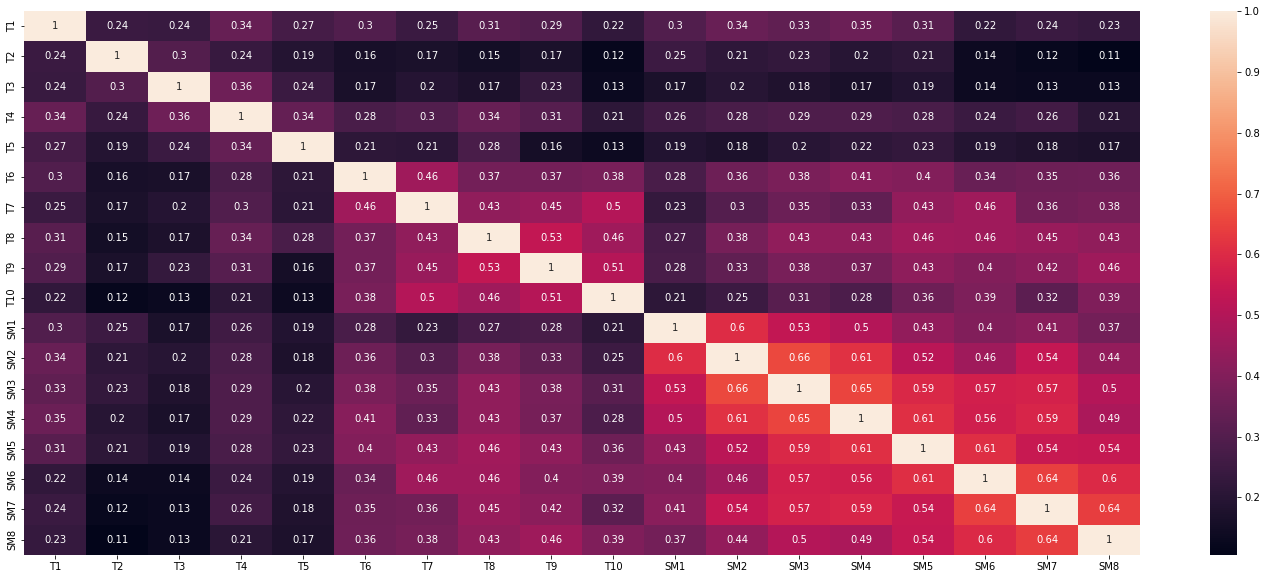

In [5]:
plt.figure(figsize=(25,10))
l = [f'T{i}' for i in range(1,11)]+[f'SM{i}' for i in range(1,9)]
sns.heatmap(df[df['Sem']==1][l].corr(), 
            xticklabels=l,
            yticklabels=l
           ,annot=True,
        
           )

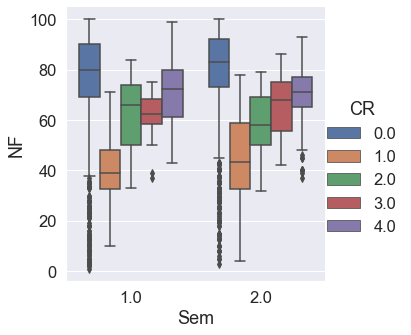

In [185]:
sns.catplot(data=df,x='Sem',y='NF',hue='CR', kind='box',dodge=True,)

In [182]:
df.groupby('Sem').Apr.describe()

count      mean       std  min  25%  50%  75%  max
Sem                                                     
1.0   979.0  0.806946  0.394897  0.0  1.0  1.0  1.0  1.0
2.0  1303.0  0.846508  0.360599  0.0  1.0  1.0  1.0  1.0

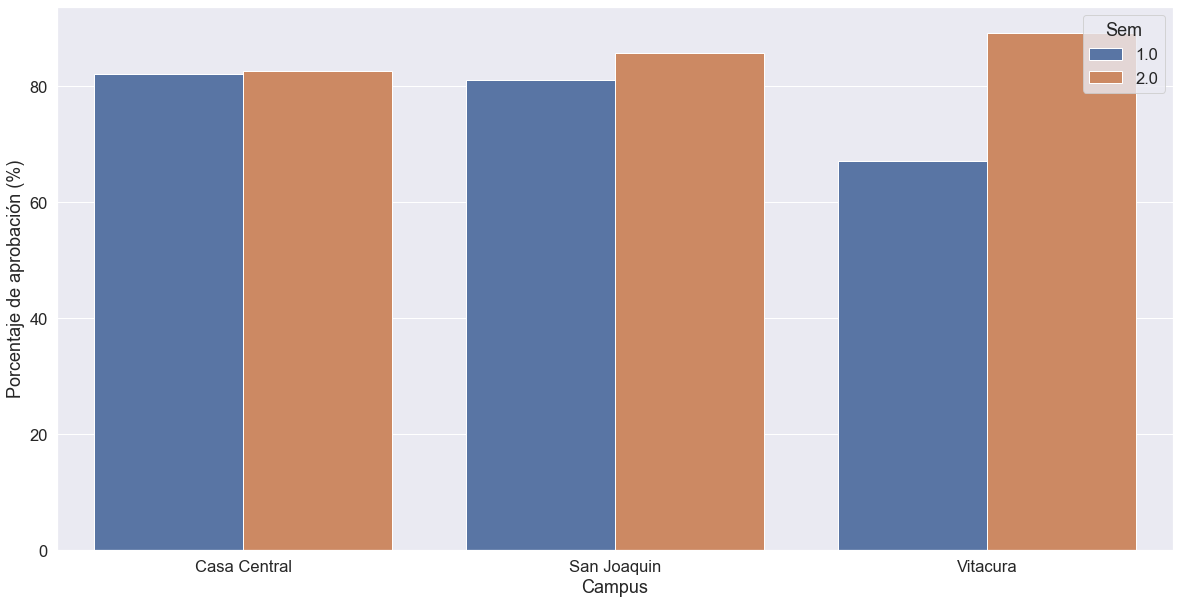

In [190]:
df_sem_apr_car= df.groupby(['Campus','Sem']).agg({'Apr': lambda x: x.mean() * 100.0}).reset_index().sort_values(['Sem','Apr'])
plt.figure(figsize=(20,10))
g = sns.barplot(data=df_sem_apr_car,x=df_sem_apr_car.Campus,y='Apr',hue='Sem',)
g.set_ylabel('Porcentaje de aprobación (%)')
#g.set_xticklabels(labels= df_sem_apr_car.Campus.unique(),rotation=-90)
g.set_xticklabels(labels=['Casa Central','San Joaquin','Vitacura'])
plt.savefig('AprSemCampus.png',bbox_inches="tight")

In [ ]:
pd.concat([ df.drop(['Depto','Carrera']).value_counts(normalize=True) for i in range (1,9)],axis=1).mul(100.0).round(2)

In [223]:
pd.melt(df[['Sem','Apr']+[f'S{i}' for i in range(1,11)]],id_vars=['Sem','Apr'])

Sem  Apr variable  value
0      2.0    1       S1    4.0
1      1.0    1       S1    4.0
2      1.0    1       S1    4.0
3      2.0    1       S1    4.0
4      1.0    0       S1    4.0
...    ...  ...      ...    ...
22815  1.0    1      S10    4.0
22816  2.0    1      S10    4.0
22817  2.0    0      S10    4.0
22818  1.0    1      S10    4.0
22819  2.0    1      S10    3.0

[22820 rows x 4 columns]

In [327]:
aa= pd.melt(df[['Sem','Apr']+[f'S{i}' for i in range(1,11)]],id_vars=['Sem','Apr']).value_counts().to_frame().reset_index().rename(columns={0:'total'})
aa.loc[aa.Sem==1,'total'] = aa.loc[aa.Sem==1,'total']/df.value_counts('Sem').loc[1]
aa.loc[aa.Sem==2,'total'] = aa.loc[aa.Sem==2,'total']/df.value_counts('Sem').loc[2]
aa

Sem  Apr variable  value     total
0    2.0    1       S3    4.0  0.825019
1    2.0    1       S1    4.0  0.812740
2    2.0    1       S4    4.0  0.808135
3    2.0    1       S7    4.0  0.800460
4    2.0    1       S5    4.0  0.797391
..   ...  ...      ...    ...       ...
152  2.0    1       S1    2.0  0.000767
153  2.0    0       S8    1.0  0.000767
154  2.0    1      S10    2.0  0.000767
155  1.0    1       S1    2.0  0.001021
156  2.0    0       S2    1.0  0.000767

[157 rows x 5 columns]

In [199]:
aa= pd.melt(df.drop(['Depto','Carrera','Campus','SM9','SM10'],axis=1),id_vars=['Sem','Apr']).value_counts().to_frame().reset_index().rename(columns={0:'total','value':'Notas'})
aa.loc[aa.Sem==1,'total'] = aa.loc[aa.Sem==1,'total']/df.value_counts('Sem').loc[1]
aa.loc[aa.Sem==2,'total'] = aa.loc[aa.Sem==2,'total']/df.value_counts('Sem').loc[2]
aa

Sem  Apr variable  Notas     total
0    2.0    1       S3    4.0  0.825019
1    2.0    1       T2    4.0  0.823484
2    2.0    1       T1    4.0  0.820414
3    2.0    1       S1    4.0  0.812740
4    2.0    1       S4    4.0  0.808135
..   ...  ...      ...    ...       ...
926  1.0    1      SM2    2.0  0.001021
927  2.0    0       S4    1.0  0.000767
928  1.0    1      SM4    1.0  0.001021
929  1.0    1       F6    2.0  0.001021
930  1.0    0      SM2    3.0  0.001021

[931 rows x 5 columns]

Empty DataFrame
Columns: [Sem, Apr, variable, Notas, total]
Index: []

<Figure size 1440x864 with 0 Axes>

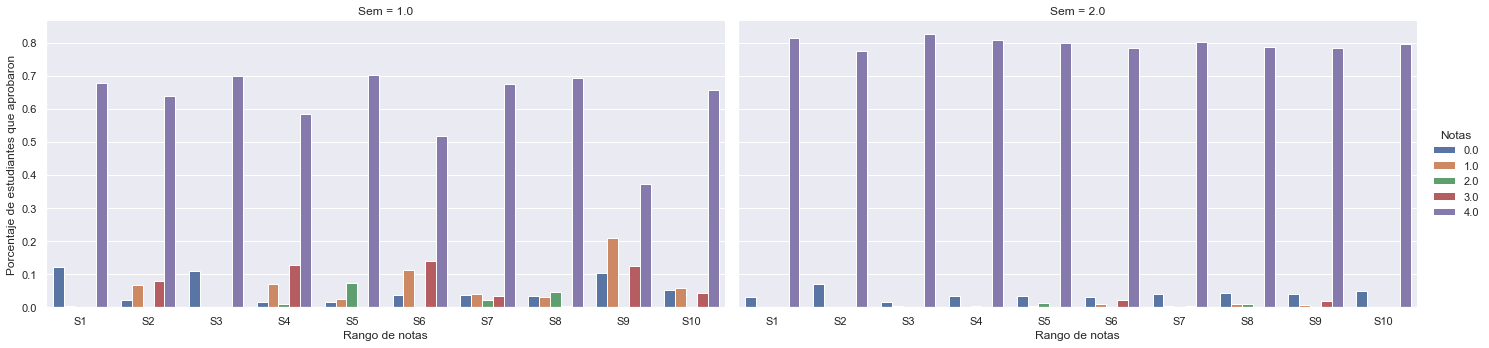

In [216]:
plt.figure(figsize=(20,12))
g= sns.catplot(
    data = aa[aa.variable.isin([f'S{i}' for i in range(1,11)])],
    x='variable',
    hue='Notas',
    ci=None,
    estimator=np.max,
    col='Sem',
    kind='bar',
    sharey=True,
    order= [f'S{i}' for i in range(1,11)],
    aspect=2,
    y='total')
g.set_ylabels('Porcentaje de estudiantes que aprobaron')
g.set_xlabels('Rango de notas')
plt.savefig('ControlesAprSem.png')

<Figure size 1440x864 with 0 Axes>

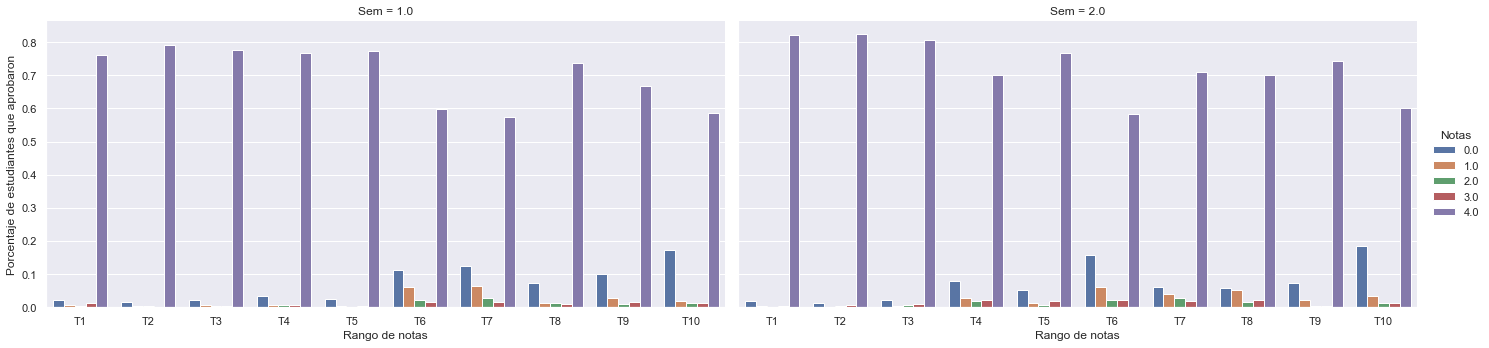

In [217]:
plt.figure(figsize=(20,12))
g= sns.catplot(
    data = aa[aa.variable.isin([f'T{i}' for i in range(1,11)])],
    x='variable',
    hue='Notas',
    ci=None,
    estimator=np.max,
    col='Sem',
    kind='bar',
    sharey=True,
    order= [f'T{i}' for i in range(1,11)],
    aspect=2,
    y='total')
g.set_ylabels('Porcentaje de estudiantes que aprobaron')
g.set_xlabels('Rango de notas')
plt.savefig('TareasAprSem.png')

<Figure size 1440x864 with 0 Axes>

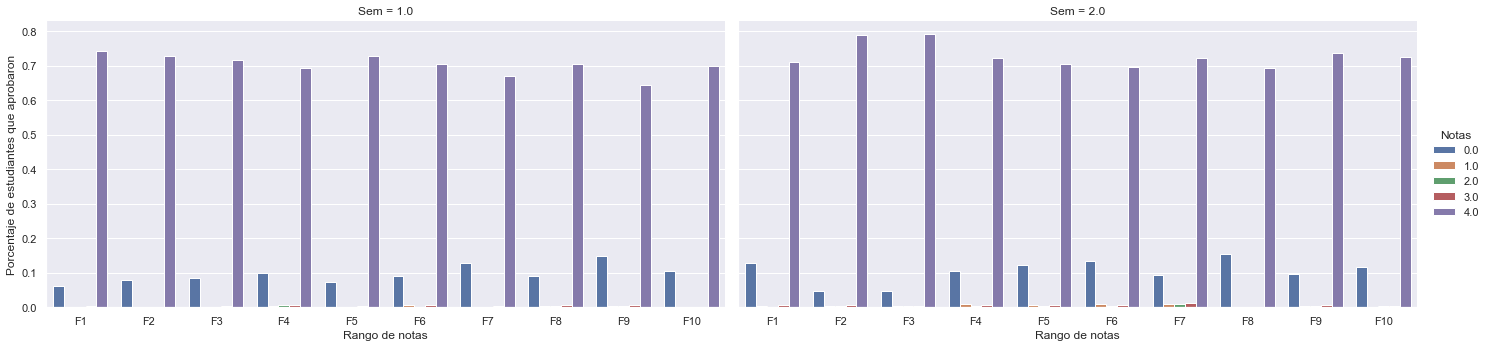

In [218]:
plt.figure(figsize=(20,12))
g= sns.catplot(
    data = aa[aa.variable.isin([f'F{i}' for i in range(1,11)])],
    x='variable',
    hue='Notas',
    ci=None,
    estimator=np.max,
    col='Sem',
    kind='bar',
    sharey=True,
    order= [f'F{i}' for i in range(1,11)],
    aspect=2,
    y='total')
g.set_ylabels('Porcentaje de estudiantes que aprobaron')
g.set_xlabels('Rango de notas')
plt.savefig('FormativosAprSem.png')

<Figure size 1440x864 with 0 Axes>

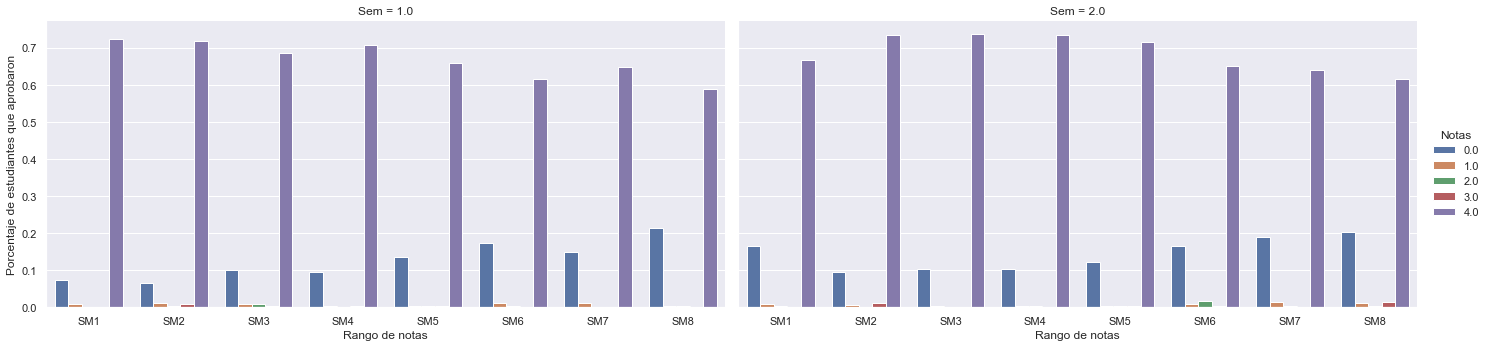

In [219]:
plt.figure(figsize=(20,12))
g= sns.catplot(
    data = aa[aa.variable.isin([f'SM{i}' for i in range(1,9)])],
    x='variable',
    hue='Notas',
    ci=None,
    estimator=np.max,
    col='Sem',
    kind='bar',
    sharey=True,
    order= [f'SM{i}' for i in range(1,9)],
    aspect=2,
    y='total')
g.set_ylabels('Porcentaje de estudiantes que aprobaron')
g.set_xlabels('Rango de notas')
plt.savefig('ActividadAprSem.png')

In [445]:
fig = px.parallel_categories(df[['Sexo','Sem','NF']], color="NF", color_continuous_scale=px.colors.sequential.Inferno,)

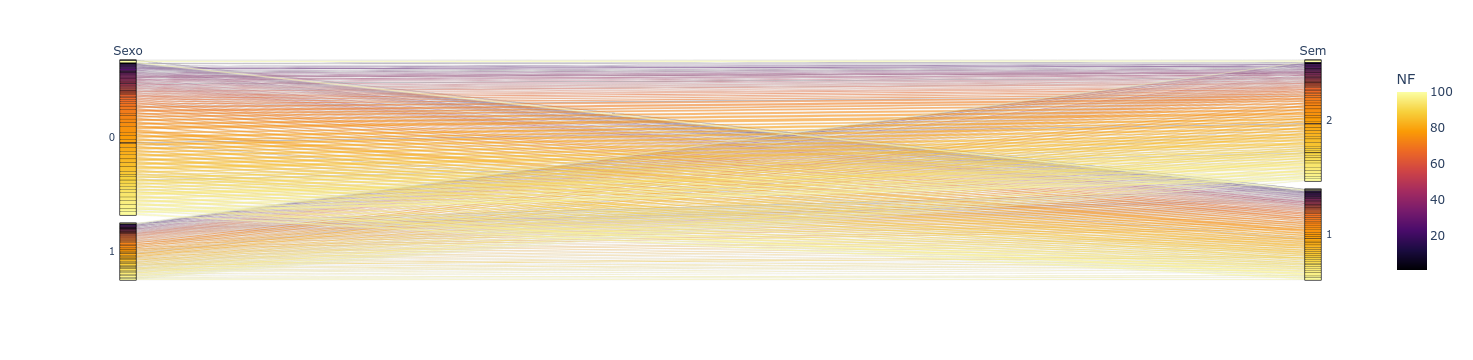

In [446]:
fig.show()